# EDA

In [68]:
import boto3
import io
import json
import pandas as pd
import numpy as np
from unidecode import unidecode

import matplotlib.pyplot as plt
import seaborn as sns; #sns.set(style="ticks", color_codes=True)

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [69]:
# AWS credentials to read files on S3 bucket
f = open('../credentials.json')
credentials = json.load(f)

s3_client = boto3.client(
    "s3",
    aws_access_key_id=credentials["Access key ID"],
    aws_secret_access_key=credentials["Secret access key"]
    )

s3_resource = boto3.resource(
    "s3",
    aws_access_key_id=credentials["Access key ID"],
    aws_secret_access_key=credentials["Secret access key"]
    )

In [70]:
# # getting preprocessed data
# stations = []
# ts_min = []
# ts_max = []

# df_full = []
# prefix_objs = s3_resource.Bucket("cge").objects.filter(Prefix="processed")
# keys = [obj.key for obj in prefix_objs]
# for key in keys[1:]:
#     obj = s3_client.get_object(Bucket="cge", Key=key)
#     df = pd.read_csv(io.BytesIO(obj["Body"].read()))
    
#     try:
#         df_grouped = df[[
#             "station_name",
#             "precipitation_lag_1H",
#             "temperature_lag_1H",
#             "relative_humidity_lag_1H",
#             "pressure_lag_1H",
#             "wind_velocity_x_lag_1H",
#             "wind_velocity_y_lag_1H",
#             "wind_blow_x_lag_1H",
#             "wind_blow_y_lag_1H"
#         ]].groupby("station_name", as_index=False).mean()
#     except:
#         df_grouped = df[[
#             "station_name",
#             "precipitation_lag_1H",
#             "temperature_lag_1H",
#             "relative_humidity_lag_1H",
#             "pressure_lag_1H"
#         ]].groupby("station_name", as_index=False).mean()

#     stations.append(df.station_name.unique()[0])
#     df['timestamp'] = pd.to_datetime(df['timestamp'])
#     ts_min.append(df['timestamp'].min())
#     ts_max.append(df['timestamp'].max())

#     df_full.append(df_grouped)

# df_grouped = pd.concat(df_full)
# df_grouped.to_csv('df_grouped.csv', index=False)
# df_grouped

In [71]:
# # getting preprocessed data
# stations = []
# ts_min = []
# ts_max = []

# df_full = []
# prefix_objs = s3_resource.Bucket("cge").objects.filter(Prefix="processed")
# keys = [obj.key for obj in prefix_objs]
# for key in keys[1:]:
#     obj = s3_client.get_object(Bucket="cge", Key=key)
#     df = pd.read_csv(io.BytesIO(obj["Body"].read()))
#     df['timestamp'] = pd.to_datetime(df['timestamp'])
#     df["date"] = df.timestamp.dt.date
        
#     try:
#         colunas_media = [
#             "precipitation_lag_1H",
#             "temperature_lag_1H",
#             "relative_humidity_lag_1H",
#             "pressure_lag_1H",
#             "wind_velocity_x_lag_1H",
#             "wind_velocity_y_lag_1H",
#             "wind_blow_x_lag_1H",
#             "wind_blow_y_lag_1H"
#         ]
        
#         df_grouped = df[["station_name", "date", "temperature_lag_1H"]].groupby(["station_name", "date"]).max()
#         df_grouped = df_grouped.rename(columns={"temperature_lag_1H": "temperature_max_lag_1H"})
#         for coluna in colunas_media:
#             df_grouped[coluna] = df.groupby(["station_name", "date"])[coluna].mean()
        
#         df_grouped = df_grouped.reset_index()
#         df_grouped = df_grouped.drop(columns=['date'])
#         df_grouped = df_grouped.groupby("station_name", as_index=False).mean()
#     except:
#         colunas_media = [
#             "precipitation_lag_1H",
#             "temperature_lag_1H",
#             "relative_humidity_lag_1H",
#             "pressure_lag_1H"
#         ]

#         df_grouped = df[["station_name", "date", "temperature_lag_1H"]].groupby(["station_name", "date"]).max()
#         df_grouped = df_grouped.rename(columns={"temperature_lag_1H": "temperature_max_lag_1H"})
#         for coluna in colunas_media:
#             df_grouped[coluna] = df.groupby(["station_name", "date"])[coluna].mean()
        
#         df_grouped = df_grouped.reset_index()
#         df_grouped = df_grouped.drop(columns=['date'])
#         df_grouped = df_grouped.groupby("station_name", as_index=False).mean()

#     stations.append(df.station_name.unique()[0])
#     df['timestamp'] = pd.to_datetime(df['timestamp'])
#     ts_min.append(df['timestamp'].min())
#     ts_max.append(df['timestamp'].max())

#     df_full.append(df_grouped)

# df_grouped = pd.concat(df_full)
# df_grouped.to_csv('df_grouped.csv', index=False)
# df_grouped

In [72]:
df_grouped = pd.read_csv('df_grouped.csv')
df_grouped

station_name  temperature_max_lag_1H  precipitation_lag_1H  \
0               Anhembi               25.809894              1.946707   
1               Butantã               26.888463              2.118611   
2           Campo Limpo               26.245359              1.721485   
3     Capela do Socorro               25.864258              1.850177   
4         Cidade Ademar               26.148745              1.750651   
5        Freguesia do Ó               26.685395              2.093484   
6              Ipiranga               25.702221              1.862576   
7        Itaim Paulista               26.265994              1.807788   
8              Itaquera               25.628051              1.835734   
9             Jabaquara               24.445703              2.048303   
10                 Lapa               25.757008              1.994698   
11          M'Boi Mirim               24.835042              1.941125   
12                 Mauá               24.512158              2.088907   
13                Mooca               26.239030              2.114647   
14          Parelheiros               23.831527              2.306866   
15                Penha               26.385856              1.972846   
16                Perus               26.666121              1.601710   
17            Pinheiros               27.302954              2.105916   
18             Pirituba               26.532862              1.842251   
19        Riacho Grande               23.556250              2.082569   
20  Santana do Parnaíba               26.372161              1.873845   
21          Santo Amaro               25.088111              1.993119   
22           São Mateus               24.987793              1.935005   
23  São Miguel Paulista               25.893036              2.204821   
24                   Sé               25.588359              2.135589   
25             Tremembé               26.968228              2.165557   
26             Tucuruvi               26.025723              1.881115   
27         Vila Formosa               25.695038              1.938597   
28           Vila Maria               25.863289              1.553308   
29         Vila Mariana               25.971015              2.016967   
30        Vila Prudente               25.715385              2.112971   

    temperature_lag_1H  relative_humidity_lag_1H  pressure_lag_1H  \
0            20.825155                 75.394623       930.825219   
1            20.476289                 80.048434       933.050308   
2            20.832254                 78.625132       931.786880   
3            18.992547                 89.171228       934.887870   
4            20.706692                 76.270377       930.909930   
5            20.671392                 79.014825       927.133534   
6            20.257977                 80.731313       930.197581   
7            20.347647                 80.674951       935.083349   
8            20.010530                 80.846747       933.174368   
9            19.241581                 73.039799       930.652137   
10           20.893822                 77.240477       935.644911   
11           19.912359                 85.297914       934.316797   
12           19.084922                 83.472866       930.357573   
13           20.945207                 77.051478       935.935981   
14           18.494682                 91.410523       927.007192   
15           21.115374                 73.807350       933.938461   
16           20.453085                 78.154983       930.128086   
17           21.049402                 76.496644       930.352934   
18           20.686494                 75.697058       931.670432   
19           18.698058                 86.335175       921.409142   
20           19.700142                 84.139334       938.059808   
21           20.232462                 79.863342       932.235127   
22           19.044164                 87.744997       931.630083   
23           20.46

In [73]:
df_grouped = df_grouped[df_grouped["station_name"].str.contains("Parelheiros") == False]
df_grouped = df_grouped.set_index("station_name")

In [74]:
df_grouped.columns = [i.split("_lag_1H")[0] for i in list(df_grouped.columns)]
df_grouped

temperature_max  precipitation  temperature  \
station_name                                                       
Anhembi                    25.809894       1.946707    20.825155   
Butantã                    26.888463       2.118611    20.476289   
Campo Limpo                26.245359       1.721485    20.832254   
Capela do Socorro          25.864258       1.850177    18.992547   
Cidade Ademar              26.148745       1.750651    20.706692   
Freguesia do Ó             26.685395       2.093484    20.671392   
Ipiranga                   25.702221       1.862576    20.257977   
Itaim Paulista             26.265994       1.807788    20.347647   
Itaquera                   25.628051       1.835734    20.010530   
Jabaquara                  24.445703       2.048303    19.241581   
Lapa                       25.757008       1.994698    20.893822   
M'Boi Mirim                24.835042       1.941125    19.912359   
Mauá                       24.512158       2.088907    19.084922   
Mooca                      26.239030       2.114647    20.945207   
Penha                      26.385856       1.972846    21.115374   
Perus                      26.666121       1.601710    20.453085   
Pinheiros                  27.302954       2.105916    21.049402   
Pirituba                   26.532862       1.842251    20.686494   
Riacho Grande              23.556250       2.082569    18.698058   
Santana do Parnaíba        26.372161       1.873845    19.700142   
Santo Amaro                25.088111       1.993119    20.232462   
São Mateus                 24.987793       1.935005    19.044164   
São Miguel Paulista        25.893036       2.204821    20.463052   
Sé                         25.588359       2.135589    20.533218   
Tremembé                   26.968228       2.165557    21.084116   
Tucuruvi                   26.025723       1.881115    20.824938   
Vila Formosa               25.695038       1.938597    20.280313   
Vila Maria                 25.863289       1.553308    20.262300   
Vila Mariana               25.971015       2.016967    20.596600   
Vila Prudente              25.715385       2.112971    20.048600   

                     relative_humidity    pressure  wind_velocity_x  \
station_name                                                          
Anhembi                      75.394623  930.825219        -0.108178   
Butantã                      80.048434  933.050308         0.020275   
Campo Limpo                  78.625132  931.786880        -0.231664   
Capela do Socorro            89.171228  934.887870              NaN   
Cidade Ademar                76.270377  930.909930         0.188561   
Freguesia do Ó               79.014825  927.133534        -0.204016   
Ipiranga                     80.731313  930.197581              NaN   
Itaim Paulista               80.674951  935.083349         0.087524   
Itaquera                     80.846747  933.174368              NaN   
Jabaquara                    73.039799  930.652137              NaN   
Lapa                         77.240477  935.644911         0.044351   
M'Boi Mirim                  85.297914  934.316797        -0.960464   
Mauá                         83.472866  930.357573        -0.110065   
Mooca                        77.051478  935.935981              NaN   
Penha                        73.807350  933.938461         0.070987   
Perus                        78.154983  930.128086        -0.095545   
Pinheiros                    76.496644  930.352934              NaN   
Pirituba                     75.697058  931.670432              NaN   
Riacho Grande                86.335175  921.409142         0.047758   
Santana do Parnaíba          84.139334  938.059808        -0.180603   
Santo Amaro                  79.863342  932.235127              NaN   
São Mateus                   87.744997  931.630083        -0.360555   
São Miguel Paulista          78.909879  933.772541              NaN   
Sé                           77.933156  923.733648         0.047418  

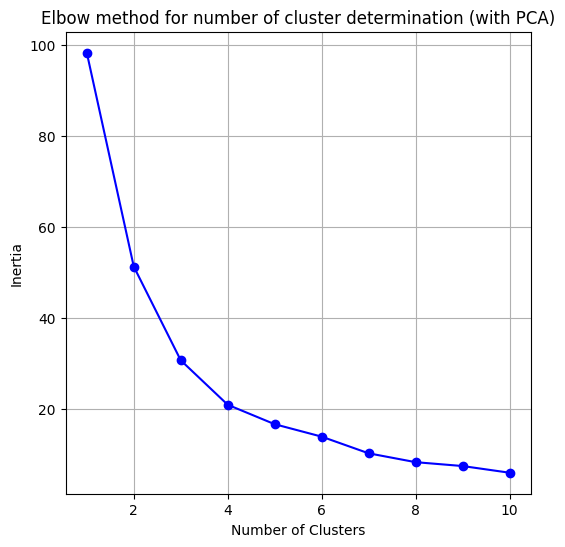

In [75]:
# Preparar os dados
X = df_grouped[[
    "temperature", 
    "relative_humidity", 
    "precipitation",
    "temperature_max"
    ]].iloc[:, :].values  # Selecionar todas as colunas do conjunto de dados

# Normalizar os dados
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# Aplicar PCA para redução de dimensionalidade
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_norm)

# Encontrar o número ideal de clusters utilizando o método Elbow
n_clusters = range(1, 11)
inertias = []
for n in n_clusters:
    kmeans = KMeans(n_clusters=n, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_pca)
    inertias.append(kmeans.inertia_)

# Plotar o gráfico do método Elbow
plt.subplots(figsize=(6, 6))
plt.plot(n_clusters, inertias, 'bo-')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow method for number of cluster determination (with PCA)')
plt.grid()
plt.savefig(f'../figures/elbow_method.png', dpi=300, bbox_inches="tight")
plt.show()

[[-0.63071924 -0.7452998 ]
 [-0.44715773  1.11326742]
 [ 2.78647318  0.00936454]]


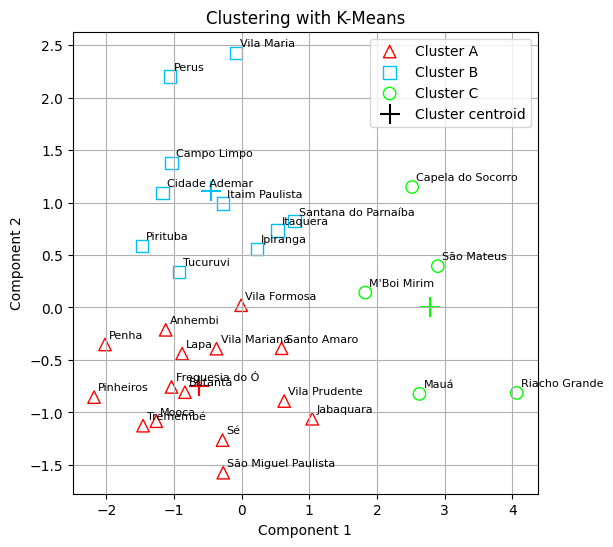

In [76]:
# Clusterizar os dados com o número de clusters escolhido
k = 3  # Número de clusters escolhido
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X_pca)

centroids = kmeans.cluster_centers_
print(centroids)

kmeans_output = pd.DataFrame(
    data=X_pca,
    index=df_grouped.index
    )

kmeans_output["cluster"] = y_kmeans

# Plotar os clusters encontrados
plt.subplots(figsize=(6, 6))

plt.scatter(
    kmeans_output[kmeans_output.cluster == 0][0], 
    kmeans_output[kmeans_output.cluster == 0][1], 
    marker="^", 
    s=80, 
    label='Cluster A',
    facecolors='none',
    edgecolors='red'
)

plt.scatter(
    kmeans_output[kmeans_output.cluster == 1][0],
    kmeans_output[kmeans_output.cluster == 1][1],
    marker="s",
    s=80,
    label='Cluster B',
    facecolors='none',
    edgecolors='deepskyblue'
)

plt.scatter(
    kmeans_output[kmeans_output.cluster == 2][0],
    kmeans_output[kmeans_output.cluster == 2][1],
    marker="o",
    s=80,
    label='Cluster C',
    facecolors='none',
    edgecolors='lime'
)
for idx, row in kmeans_output.iterrows(): 
    plt.text(row[0]+.06, row[1]+.06, idx, size=8)

plt.scatter(centroids[0][0], centroids[0][1], marker="+", s=200, c='black', label='Cluster centroid')
plt.scatter(centroids[0][0], centroids[0][1], marker="+", s=200, c='red', label='_nolegend_')
plt.scatter(centroids[1][0], centroids[1][1], marker="+", s=200, c='deepskyblue', label='_nolegend_')
plt.scatter(centroids[2][0], centroids[2][1], marker="+", s=200, c='lime', label='_nolegend_')


plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Clustering with K-Means')
plt.grid()
plt.legend(prop={'size': 10})
plt.savefig(f'../figures/clusters.png', dpi=300, bbox_inches="tight")
plt.show()

In [77]:
df_grouped = df_grouped.merge(kmeans_output, left_index=True, right_index=True)
df_grouped = df_grouped.drop([0, 1], axis=1)
df_grouped = df_grouped.sort_values("cluster")
df_grouped = df_grouped[["precipitation", "temperature", "relative_humidity", "temperature_max", "cluster"]]
df_grouped['cluster'] = df_grouped['cluster'].map({0: "A", 1: "B", 2: "C"})
df_grouped_2 = df_grouped
df_grouped

precipitation  temperature  relative_humidity  \
station_name                                                         
Anhembi                   1.946707    20.825155          75.394623   
Vila Formosa              1.938597    20.280313          79.040443   
Tremembé                  2.165557    21.084116          80.116349   
Sé                        2.135589    20.533218          77.933156   
São Miguel Paulista       2.204821    20.463052          78.909879   
Santo Amaro               1.993119    20.232462          79.863342   
Pinheiros                 2.105916    21.049402          76.496644   
Vila Mariana              2.016967    20.596600          79.831629   
Mooca                     2.114647    20.945207          77.051478   
Lapa                      1.994698    20.893822          77.240477   
Penha                     1.972846    21.115374          73.807350   
Freguesia do Ó            2.093484    20.671392          79.014825   
Butantã                   2.118611    20.476289          80.048434   
Jabaquara                 2.048303    19.241581          73.039799   
Vila Prudente             2.112971    20.048600          81.760013   
Perus                     1.601710    20.453085          78.154983   
Ipiranga                  1.862576    20.257977          80.731313   
Pirituba                  1.842251    20.686494          75.697058   
Santana do Parnaíba       1.873845    19.700142          84.139334   
Itaquera                  1.835734    20.010530          80.846747   
Cidade Ademar             1.750651    20.706692          76.270377   
Campo Limpo               1.721485    20.832254          78.625132   
Tucuruvi                  1.881115    20.824938          77.993179   
Vila Maria                1.553308    20.262300          79.885617   
Itaim Paulista            1.807788    20.347647          80.674951   
Riacho Grande             2.082569    18.698058          86.335175   
São Mateus                1.935005    19.044164          87.744997   
Capela do Socorro         1.850177    18.992547          89.171228   
Mauá                      2.088907    19.084922          83.472866   
M'Boi Mirim               1.941125    19.912359          85.297914   

                     temperature_max cluster  
station_name                                  
Anhembi                    25.809894       A  
Vila Formosa               25.695038       A  
Tremembé                   26.968228       A  
Sé                         25.588359       A  
São Miguel Paulista        25.893036       A  
Santo Amaro                25.088111       A  
Pinheiros                  27.302954       A  
Vila Mariana               25.971015       A  
Mooca                      26.239030       A  
Lapa                       25.757008       A  
Penha                      26.385856       A  
Freguesia do Ó             26.685395       A  
Butantã                    26.888463       A  
Jabaquara                  24.445703       A  
Vila Prudente              25.715385       A  
Perus                      26.666121       B  
Ipiranga                   25.702221       B  
Pirituba                   26.532862       B  
Santana do Parnaíba        26.372161       B  
Itaquera                   25.628051       B  
Cidade Ademar              26.148745       B  
Campo Limpo                26.245359       B  
Tucuruvi                   26.025723       B  
Vila Maria                 25.863289       B  
Itaim Paulista             26.265994       B  
Riacho Grande              23.556250       C  
São Mateus                 24.987793       C  
Capela do Socorro          25.864258       C  
Mauá                       24.512158       C  
M'Boi Mirim                24.835042       C

In [78]:
# getting preprocessed data
df_full_0 = []
df_full_1 = []
df_full_2 = []
prefix_objs = s3_resource.Bucket("cge").objects.filter(Prefix="processed")
keys = [obj.key for obj in prefix_objs]
for key in keys[1:]:
    obj = s3_client.get_object(Bucket="cge", Key=key)
    df = pd.read_csv(io.BytesIO(obj["Body"].read()))
    
    try:
        df_2 = df[[
            "timestamp",
            "station_name",
            "precipitation_lag_1H",
            "temperature_lag_1H",
            "relative_humidity_lag_1H",
            "pressure_lag_1H",
            "wind_velocity_x_lag_1H",
            "wind_velocity_y_lag_1H",
            "wind_blow_x_lag_1H",
            "wind_blow_y_lag_1H"
        ]]
    except:
        df_2 = df[[
            "timestamp",
            "station_name",
            "precipitation_lag_1H",
            "temperature_lag_1H",
            "relative_humidity_lag_1H",
            "pressure_lag_1H"
        ]]
    

    if df_2.station_name.unique()[0] in list(df_grouped[df_grouped.cluster == "A"].index): 
        df_full_0.append(df_2)
    if df_2.station_name.unique()[0] in list(df_grouped[df_grouped.cluster == "B"].index): 
        df_full_1.append(df_2)
    if df_2.station_name.unique()[0] in list(df_grouped[df_grouped.cluster == "C"].index): 
        df_full_2.append(df_2)

df_cluster_A = pd.concat(df_full_0)
df_cluster_A.to_csv("df_cluster_A.csv", index=False)

df_cluster_B = pd.concat(df_full_1)
df_cluster_B.to_csv("df_cluster_B.csv", index=False)

df_cluster_C = pd.concat(df_full_2)
df_cluster_C.to_csv("df_cluster_C.csv", index=False)

In [79]:
df_cluster_A = pd.read_csv("df_cluster_A.csv")
df_cluster_B = pd.read_csv("df_cluster_B.csv")
df_cluster_C = pd.read_csv("df_cluster_C.csv")

In [80]:
obj = s3_client.get_object(Bucket="cge", Key='processed/parelheiros.csv')
df_parelheiros = pd.read_csv(io.BytesIO(obj["Body"].read()))
df_parelheiros = df_parelheiros[["timestamp", "temperature"]].rename(columns={"temperature": "temperature_rural"}).dropna()
df_parelheiros 

timestamp  temperature_rural
21     2012-08-14 15:00:00          18.578000
22     2012-08-14 16:00:00          19.113833
23     2012-08-14 17:00:00          18.368333
24     2012-08-14 18:00:00          15.808667
25     2012-08-14 19:00:00          14.875333
...                    ...                ...
57120  2019-02-18 18:00:00          24.683000
57121  2019-02-18 19:00:00          23.723167
57122  2019-02-18 20:00:00          22.447333
57123  2019-02-18 21:00:00          21.134667
57124  2019-02-18 22:00:00          20.740200

[56281 rows x 2 columns]

In [81]:
df_cluster_A = df_cluster_A.merge(df_parelheiros, on="timestamp")
df_cluster_B = df_cluster_B.merge(df_parelheiros, on="timestamp")
df_cluster_C = df_cluster_C.merge(df_parelheiros, on="timestamp")

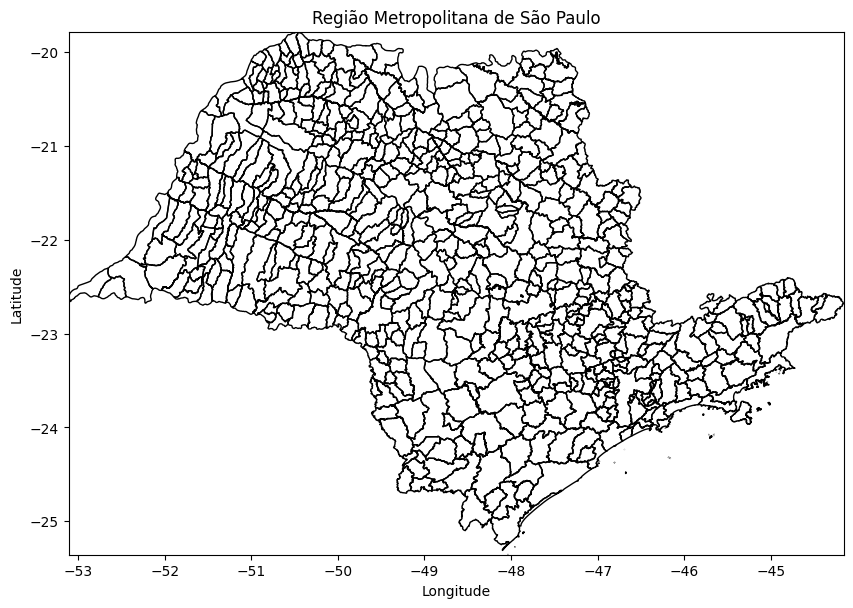

In [82]:
# ref: https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/15774-malhas.html?=&t=downloads

import geopandas as gpd
import matplotlib.pyplot as plt

epsg = 4326

# Carregue o arquivo shapefile
sp = gpd.read_file('SP_Municipios_2022')
sp = sp.to_crs(f'EPSG:{epsg}')

# Plote o mapa da RMSP
fig, ax = plt.subplots(figsize=(10, 10))
sp.plot(ax=ax, edgecolor='black', facecolor='none')

# Ajuste os limites do gráfico para mostrar apenas a RMSP
ax.set_xlim(sp.bounds.minx.min(), sp.bounds.maxx.max())
ax.set_ylim(sp.bounds.miny.min(), sp.bounds.maxy.max())

# Adicione títulos e rótulos
ax.set_title('Região Metropolitana de São Paulo')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Exiba o gráfico
plt.show()


In [83]:
df_grouped = df_grouped.reset_index()[["station_name", "cluster"]]
df_grouped["color"] = df_grouped.cluster.map({"A": "green", "B": "red", "C": "blue"})
df_grouped

station_name cluster  color
0               Anhembi       A  green
1          Vila Formosa       A  green
2              Tremembé       A  green
3                    Sé       A  green
4   São Miguel Paulista       A  green
5           Santo Amaro       A  green
6             Pinheiros       A  green
7          Vila Mariana       A  green
8                 Mooca       A  green
9                  Lapa       A  green
10                Penha       A  green
11       Freguesia do Ó       A  green
12              Butantã       A  green
13            Jabaquara       A  green
14        Vila Prudente       A  green
15                Perus       B    red
16             Ipiranga       B    red
17             Pirituba       B    red
18  Santana do Parnaíba       B    red
19             Itaquera       B    red
20        Cidade Ademar       B    red
21          Campo Limpo       B    red
22             Tucuruvi       B    red
23           Vila Maria       B    red
24       Itaim Paulista       B    red
25        Riacho Grande       C   blue
26           São Mateus       C   blue
27    Capela do Socorro       C   blue
28                 Mauá       C   blue
29          M'Boi Mirim       C   blue

In [84]:
localization_stations = pd.read_csv("estacoes_meteorologicas_cge.csv")
localization_stations

station        lat        lon
0                    Sé -23.552718 -46.656168
1               Anhembi -23.518626 -46.643757
2          Vila Mariana -23.584720 -46.635560
3              Ipiranga -23.632978 -46.583518
4           Campo Limpo -23.658180 -46.767490
5           M'Boi Mirim -23.671266 -46.727361
6           Santo Amaro -23.634789 -46.667657
7             Jabaquara -23.650814 -46.646581
8         Cidade Ademar -23.667670 -46.674160
9     Capela do Socorro -23.781133 -46.725217
10          Parelheiros -23.867778 -46.652222
11                Mooca -23.530000 -46.591670
12                Penha -23.530763 -46.528744
13         Vila Formosa -23.563309 -46.508798
14        Vila Prudente -23.583219 -46.560179
15             Itaquera -23.552301 -46.446110
16           São Mateus -23.594199 -46.465567
17  São Miguel Paulista -23.491511 -46.453618
18       Itaim Paulista -23.490670 -46.435990
19            Pinheiros -23.551871 -46.695939
20              Butantã -23.554516 -46.726570
21                 Lapa -23.525560 -46.750830
22                Perus -23.407443 -46.753125
23             Pirituba -23.488606 -46.727320
24       Freguesia do Ó -23.477060 -46.665370
25             Tremembé -23.459841 -46.585572
26           Vila Maria -23.501611 -46.591534
27             Tucuruvi -23.511211 -46.619502
28  Santana do Parnaíba -23.437940 -46.909450
29        Riacho Grande -23.752079 -46.532528
30                 Mauá -23.668383 -46.466539

In [85]:
localization_stations = localization_stations.merge(
    df_grouped,
    left_on="station",
    right_on="station_name"
    )

localization_stations

station        lat        lon         station_name cluster  \
0                    Sé -23.552718 -46.656168                   Sé       A   
1               Anhembi -23.518626 -46.643757              Anhembi       A   
2          Vila Mariana -23.584720 -46.635560         Vila Mariana       A   
3              Ipiranga -23.632978 -46.583518             Ipiranga       B   
4           Campo Limpo -23.658180 -46.767490          Campo Limpo       B   
5           M'Boi Mirim -23.671266 -46.727361          M'Boi Mirim       C   
6           Santo Amaro -23.634789 -46.667657          Santo Amaro       A   
7             Jabaquara -23.650814 -46.646581            Jabaquara       A   
8         Cidade Ademar -23.667670 -46.674160        Cidade Ademar       B   
9     Capela do Socorro -23.781133 -46.725217    Capela do Socorro       C   
10                Mooca -23.530000 -46.591670                Mooca       A   
11                Penha -23.530763 -46.528744                Penha       A   
12         Vila Formosa -23.563309 -46.508798         Vila Formosa       A   
13        Vila Prudente -23.583219 -46.560179        Vila Prudente       A   
14             Itaquera -23.552301 -46.446110             Itaquera       B   
15           São Mateus -23.594199 -46.465567           São Mateus       C   
16  São Miguel Paulista -23.491511 -46.453618  São Miguel Paulista       A   
17       Itaim Paulista -23.490670 -46.435990       Itaim Paulista       B   
18            Pinheiros -23.551871 -46.695939            Pinheiros       A   
19              Butantã -23.554516 -46.726570              Butantã       A   
20                 Lapa -23.525560 -46.750830                 Lapa       A   
21                Perus -23.407443 -46.753125                Perus       B   
22             Pirituba -23.488606 -46.727320             Pirituba       B   
23       Freguesia do Ó -23.477060 -46.665370       Freguesia do Ó       A   
24             Tremembé -23.459841 -46.585572             Tremembé       A   
25           Vila Maria -23.501611 -46.591534           Vila Maria       B   
26             Tucuruvi -23.511211 -46.619502             Tucuruvi       B   
27  Santana do Parnaíba -23.437940 -46.909450  Santana do Parnaíba       B   
28        Riacho Grande -23.752079 -46.532528        Riacho Grande       C   
29                 Mauá -23.668383 -46.466539                 Mauá       C   

    color  
0   green  
1   green  
2   green  
3     red  
4     red  
5    blue  
6   green  
7   green  
8     red  
9    blue  
10  green  
11  green  
12  green  
13  green  
14    red  
15   blue  
16  green  
17    red  
18  green  
19  green  
20  green  
21    red  
22    red  
23  green  
24  green  
25    red  
26    red  
27    red  
28   blue  
29   blue

In [86]:
localization_stations[['station', 'lat', 'lon']].to_latex('stations_table.tex', index=False)

/tmp/ipykernel_5081/3138702148.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  localization_stations[['station', 'lat', 'lon']].to_latex('stations_table.tex', index=False)


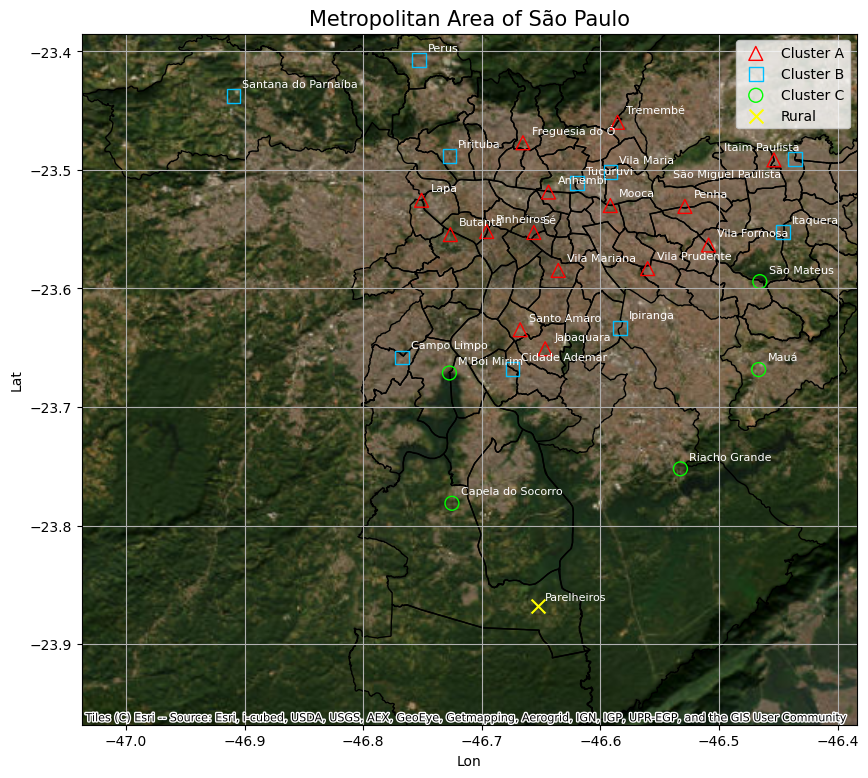

In [87]:
import contextily as ctx

masp_cities = [
    "Mauá",  
    "São Bernardo do Campo",  
    "Santana de Parnaíba", 
]

sp_masp_cities = sp[sp.NM_MUN.isin(masp_cities)]

sp_cidade = gpd.read_file('LAYER_DISTRITO')
sp_cidade = sp_cidade.to_crs(f'EPSG:{epsg}')

weather_stations_cluster_A = list(localization_stations[localization_stations.cluster == "A"][["lat", "lon"]].itertuples(index=False, name=None))
weather_stations_cluster_B = list(localization_stations[localization_stations.cluster == "B"][["lat", "lon"]].itertuples(index=False, name=None))
weather_stations_cluster_C = list(localization_stations[localization_stations.cluster == "C"][["lat", "lon"]].itertuples(index=False, name=None))

# Crie um GeoDataFrame com as coordenadas das estações meteorológicas e atribua o CRS (EPSG: 4326)
weather_stations_gdf_cluster_A = gpd.GeoDataFrame(geometry=gpd.points_from_xy([x[1] for x in weather_stations_cluster_A], [x[0] for x in weather_stations_cluster_A]), crs=f"EPSG:{epsg}")
weather_stations_gdf_cluster_B = gpd.GeoDataFrame(geometry=gpd.points_from_xy([x[1] for x in weather_stations_cluster_B], [x[0] for x in weather_stations_cluster_B]), crs=f"EPSG:{epsg}")
weather_stations_gdf_cluster_C = gpd.GeoDataFrame(geometry=gpd.points_from_xy([x[1] for x in weather_stations_cluster_C], [x[0] for x in weather_stations_cluster_C]), crs=f"EPSG:{epsg}")

# Converta as coordenadas das estações meteorológicas para o sistema de coordenadas Web Mercator (EPSG: 3857)
weather_stations_gdf_cluster_A_projected = weather_stations_gdf_cluster_A.to_crs(epsg=epsg)
weather_stations_gdf_cluster_B_projected = weather_stations_gdf_cluster_B.to_crs(epsg=epsg)
weather_stations_gdf_cluster_C_projected = weather_stations_gdf_cluster_C.to_crs(epsg=epsg)

# Plote o mapa da RMSP
fig, ax = plt.subplots(figsize=(10, 10))
sp_masp_cities.plot(ax=ax, edgecolor='black', facecolor='none')
sp_cidade.plot(ax=ax, edgecolor='black', facecolor='none')

# Adicione a imagem de satélite usando o Contextily
ctx.add_basemap(
    ax, 
    source=ctx.providers.Esri.WorldImagery, 
    # zoom="auto", 
    crs=f"EPSG:{epsg}"
)

# Plote os pontos das estações meteorológicas
ax.scatter(
    weather_stations_gdf_cluster_A_projected.geometry.x, 
    weather_stations_gdf_cluster_A_projected.geometry.y,
    marker="^",
    s=100,
    label='Cluster A',
    facecolors='none',
    edgecolors='red'
)

ax.scatter(
    weather_stations_gdf_cluster_B_projected.geometry.x, 
    weather_stations_gdf_cluster_B_projected.geometry.y, 
    marker="s",
    s=100,
    label='Cluster B',
    facecolors='none',
    edgecolors='deepskyblue'
)

ax.scatter(
    weather_stations_gdf_cluster_C_projected.geometry.x, 
    weather_stations_gdf_cluster_C_projected.geometry.y,
    marker="o",
    s=100,
    label='Cluster C',
    facecolors='none',
    edgecolors='lime'
)

# Plote da estação de referência rural
ax.scatter(
    -46.652222, 
    -23.867778, 
    marker="x",
    s=100,
    label='Rural',
    color='yellow'
)

# Ajuste os limites do gráfico para mostrar apenas a RMSP
ax.set_xlim(sp_masp_cities.bounds.minx.min(), sp_masp_cities.bounds.maxx.max())
ax.set_ylim(sp_masp_cities.bounds.miny.min(), sp_masp_cities.bounds.maxy.max())

# Adicione títulos e rótulos
ax.set_title('Metropolitan Area of São Paulo', fontdict={'fontsize': 15})
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

# Adicione a legenda
ax.legend()
ax.grid()

for idx, row in localization_stations.set_index('station').iterrows(): 
    if idx not in ['Itaim Paulista', 'São Miguel Paulista']:
        plt.text(
            row['lon']+0.0075, 
            row['lat']+0.0075, 
            idx, 
            size=8, 
            color='white'
        )
    elif idx == 'Itaim Paulista':
        plt.text(
            row['lon']-0.06, 
            row['lat']+0.0075, 
            idx, 
            size=8, 
            color='white'
        )
    elif idx == 'São Miguel Paulista':
        plt.text(
            row['lon']-0.085, 
            row['lat']-0.015, 
            idx, 
            size=8, 
            color='white'
        )

plt.text(
    -46.652222+0.005, 
    -23.867778+0.005, 
    'Parelheiros', 
    size=8, 
    color='white'
)

# Exiba o gráfico
plt.savefig(f'../figures/masp_clusters.png', dpi=300, bbox_inches="tight")
plt.show()

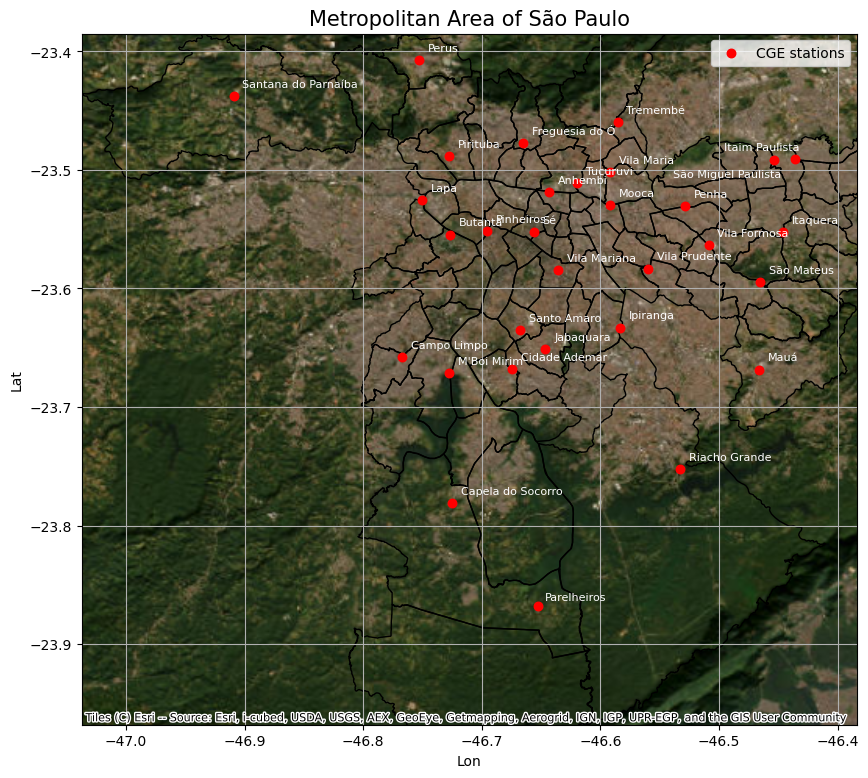

In [88]:
import contextily as ctx

masp_cities = [
    "Mauá",  
    "São Bernardo do Campo",  
    "Santana de Parnaíba", 
]

sp_masp_cities = sp[sp.NM_MUN.isin(masp_cities)]

sp_cidade = gpd.read_file('LAYER_DISTRITO')
sp_cidade = sp_cidade.to_crs(f'EPSG:{epsg}')

weather_stations_cluster_A = list(localization_stations[localization_stations.cluster == "A"][["lat", "lon"]].itertuples(index=False, name=None))
weather_stations_cluster_B = list(localization_stations[localization_stations.cluster == "B"][["lat", "lon"]].itertuples(index=False, name=None))
weather_stations_cluster_C = list(localization_stations[localization_stations.cluster == "C"][["lat", "lon"]].itertuples(index=False, name=None))

# Crie um GeoDataFrame com as coordenadas das estações meteorológicas e atribua o CRS (EPSG: 4326)
weather_stations_gdf_cluster_A = gpd.GeoDataFrame(geometry=gpd.points_from_xy([x[1] for x in weather_stations_cluster_A], [x[0] for x in weather_stations_cluster_A]), crs=f"EPSG:{epsg}")
weather_stations_gdf_cluster_B = gpd.GeoDataFrame(geometry=gpd.points_from_xy([x[1] for x in weather_stations_cluster_B], [x[0] for x in weather_stations_cluster_B]), crs=f"EPSG:{epsg}")
weather_stations_gdf_cluster_C = gpd.GeoDataFrame(geometry=gpd.points_from_xy([x[1] for x in weather_stations_cluster_C], [x[0] for x in weather_stations_cluster_C]), crs=f"EPSG:{epsg}")

# Converta as coordenadas das estações meteorológicas para o sistema de coordenadas Web Mercator (EPSG: 3857)
weather_stations_gdf_cluster_A_projected = weather_stations_gdf_cluster_A.to_crs(epsg=epsg)
weather_stations_gdf_cluster_B_projected = weather_stations_gdf_cluster_B.to_crs(epsg=epsg)
weather_stations_gdf_cluster_C_projected = weather_stations_gdf_cluster_C.to_crs(epsg=epsg)

# Plote o mapa da RMSP
fig, ax = plt.subplots(figsize=(10, 10))
sp_masp_cities.plot(ax=ax, edgecolor='black', facecolor='none')
sp_cidade.plot(ax=ax, edgecolor='black', facecolor='none')

# Adicione a imagem de satélite usando o Contextily
ctx.add_basemap(
    ax, 
    source=ctx.providers.Esri.WorldImagery, 
    # zoom="auto", 
    crs=f"EPSG:{epsg}"
)

# Plote os pontos das estações meteorológicas
for idx, row in localization_stations.set_index('station').iterrows(): 
    ax.scatter(
        row['lon'], 
        row['lat'],
        marker=".",
        s=150,
        label='_nolegend_',
        color='red'
    )

# Plote da estação de referência rural
ax.scatter(
    -46.652222, 
    -23.867778, 
    marker=".",
        s=150,
        label='CGE stations',
        color='red'
)

# Ajuste os limites do gráfico para mostrar apenas a RMSP
ax.set_xlim(sp_masp_cities.bounds.minx.min(), sp_masp_cities.bounds.maxx.max())
ax.set_ylim(sp_masp_cities.bounds.miny.min(), sp_masp_cities.bounds.maxy.max())

# Adicione títulos e rótulos
ax.set_title('Metropolitan Area of São Paulo', fontdict={'fontsize': 15})
ax.set_xlabel('Lon')
ax.set_ylabel('Lat')

# Adicione a legenda
ax.legend()
ax.grid()

for idx, row in localization_stations.set_index('station').iterrows(): 
    if idx not in ['Itaim Paulista', 'São Miguel Paulista']:
        plt.text(
            row['lon']+0.0075, 
            row['lat']+0.0075, 
            idx, 
            size=8, 
            color='white'
        )
    elif idx == 'Itaim Paulista':
        plt.text(
            row['lon']-0.06, 
            row['lat']+0.0075, 
            idx, 
            size=8, 
            color='white'
        )
    elif idx == 'São Miguel Paulista':
        plt.text(
            row['lon']-0.085, 
            row['lat']-0.015, 
            idx, 
            size=8, 
            color='white'
        )

plt.text(
    -46.652222+0.005, 
    -23.867778+0.005, 
    'Parelheiros', 
    size=8, 
    color='white'
)

# Exiba o gráfico
plt.savefig(f'../figures/cge_stations.png', dpi=300, bbox_inches="tight")
plt.show()

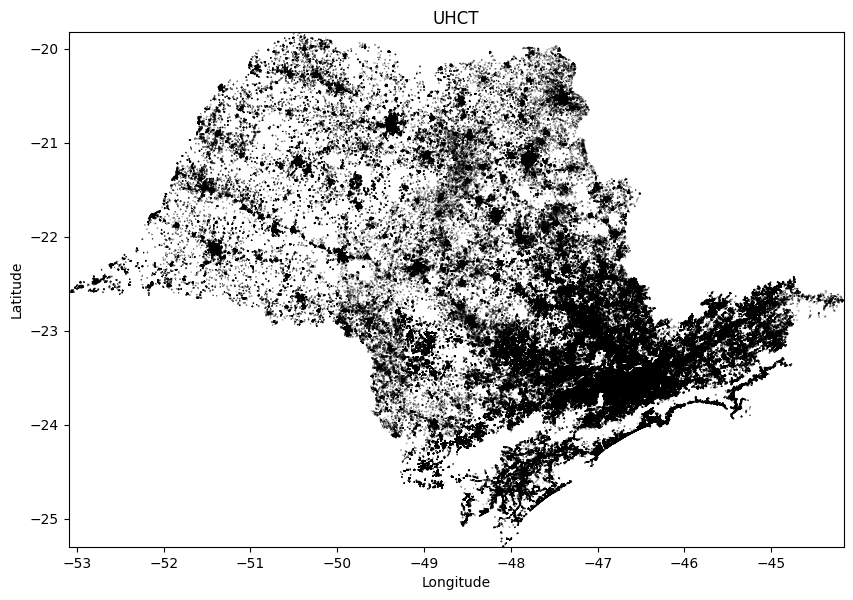

In [89]:
# Carregue o arquivo shapefile
uhct = gpd.read_file('UHCT_112015_v2')
new_crs = 'EPSG:4326'
uhct = uhct.to_crs(new_crs)

# Plote o mapa da RMSP
fig, ax = plt.subplots(figsize=(10, 10))
uhct.plot(ax=ax, edgecolor='black', facecolor='none')

# Ajuste os limites do gráfico para mostrar apenas a RMSP
ax.set_xlim(uhct.bounds.minx.min(), uhct.bounds.maxx.max())
ax.set_ylim(uhct.bounds.miny.min(), uhct.bounds.maxy.max())

# Adicione títulos e rótulos
ax.set_title('UHCT')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Exiba o gráfico
plt.show()


In [90]:
list(uhct.Uso_ocup.unique())

['agua',
 'mata',
 'area desocupada',
 'espaco verde urbano',
 'grandes equipamentos',
 'loteamento',
 'residencial comercial servicos',
 'comercial servicos praia']

In [91]:
list(uhct.Den_ocup.unique())

[nan,
 'alta densidade',
 'baixa densidade',
 'media densidade',
 'muito alta densidade',
 'muito baixa densidade']

In [92]:
list(uhct.Est_ocup.unique())

[nan, 'consolidado', 'em consolidacao', 'rarefeito']

In [93]:
list(uhct.Ord_urb.unique())

[nan,
 'alto ordenamento',
 'medio ordenamento',
 'muito alto ordenamento',
 'baixo ordenamento',
 'muito baixo ordenamento']

In [94]:
list(uhct.Area_ha.unique())

[nan]

In [95]:
# uhct_agua = uhct[uhct.Uso_ocup == 'agua']
# uhct_mata = uhct[uhct.Uso_ocup == 'mata']
# uhct_area_desocupada = uhct[uhct.Uso_ocup == 'area desocupada']
# uhct_espaco_verde_urbano = uhct[uhct.Uso_ocup == 'espaco verde urbano']
# uhct_grandes_equipamentos = uhct[uhct.Uso_ocup == 'grandes equipamentos']
# uhct_residencial_comercial_servicos = uhct[uhct.Uso_ocup == 'residencial comercial servicos']
# uhct_comercial_servicos_praia = uhct[uhct.Uso_ocup == 'comercial servicos praia']

In [96]:
import geopandas as gpd
import numpy as np
from shapely.geometry import Point

# df_uhct = []
# for i in range(0, len(localization_stations)):
#     # Carregar o shapefile
#     shapefile_path = "UHCT_112015_v2"
#     gdf = gpd.read_file(shapefile_path)

#     # Coordenadas da estação meteorológica
#     latitude = localization_stations['lat'][i]
#     longitude = localization_stations['lon'][i]
#     station_point = Point(longitude, latitude)

#     # Criar um buffer de 500 metros ao redor da estação meteorológica
#     buffer_radius = 500  # metros
#     buffer = station_point.buffer(buffer_radius / 111320)  # aproximadamente 1 grau = 111.32km

#     # Selecionar polígonos que interseccionam com o buffer
#     buffer_gdf = gpd.GeoDataFrame(geometry=[buffer], crs=gdf.crs)
#     intersected_polygons = gpd.overlay(gdf, buffer_gdf, how="intersection")

#     # Calcular a área de cada polígono e a área total no buffer
#     intersected_polygons["area"] = intersected_polygons.geometry.area * 111320**2
#     total_area = intersected_polygons["area"].sum()

#     # Calcular a porcentagem de uso e ocupação do solo
#     percentages = (intersected_polygons.groupby("Uso_ocup")["area"].sum() / total_area) * 100

#     df = pd.DataFrame(percentages).reset_index()

#     df_pivot = pd.pivot_table(
#         df, 
#         values='area',
#         columns=['Uso_ocup']
#     ).reset_index()

#     df_pivot['station'] = localization_stations['station'][i]
#     df_uhct.append(df_pivot)

# uhct_perc = pd.concat(df_uhct)
# uhct_perc.to_csv("uhct_perc.csv")
# uhct_perc

In [97]:
uhct_perc = pd.read_csv("uhct_perc.csv")
uhct_perc

Unnamed: 0 index  grandes equipamentos  residencial comercial servicos  \
0            0  area             15.701369                       84.298631   
1            0  area             76.740570                       10.117707   
2            0  area             21.383760                       78.616240   
3            0  area             24.414955                       68.747963   
4            0  area             34.903320                       58.311786   
5            0  area             70.911764                       23.144509   
6            0  area             20.920701                       70.229395   
7            0  area             34.699209                       65.300791   
8            0  area             12.826824                       87.173176   
9            0  area              9.025229                       90.974771   
10           0  area             92.733248                             NaN   
11           0  area             35.626760                       64.373240   
12           0  area             46.860946                       49.479180   
13           0  area             52.044762                       47.955238   
14           0  area             25.932606                       74.067394   
15           0  area             45.003795                        4.544428   
16           0  area             29.930007                       52.500288   
17           0  area             37.216467                       57.869498   
18           0  area              1.986251                       95.115602   
19           0  area             78.147647                             NaN   
20           0  area             76.632565                        1.621258   
21           0  area             15.913293                       80.885611   
22           0  area             40.197771                       56.547993   
23           0  area             43.956536                       56.043464   
24           0  area             36.487432                       62.103747   
25           0  area             10.133287                       89.866713   
26           0  area             78.623062                       19.157597   
27           0  area              1.821456                       98.178544   
28           0  area             27.581394                       72.418606   
29           0  area             74.298890                       17.397593   

                station       agua  espaco verde urbano  loteamento      mata  \
0                    Sé        NaN                  NaN         NaN       NaN   
1               Anhembi  10.654633             2.487090         NaN       NaN   
2          Vila Mariana        NaN                  NaN         NaN       NaN   
3              Ipiranga   6.443829             0.393253         NaN       NaN   
4           Campo Limpo        NaN                  NaN    6.721434   0.06346   
5           M'Boi Mirim   4.950781             0.992946         NaN       NaN   
6           Santo Amaro        NaN             8.849904         NaN       NaN   
7             Jabaquara        NaN                  NaN         NaN       NaN   
8         Cidade Ademar        NaN                  NaN         NaN       NaN   
9     Capela do Socorro        NaN                  NaN         NaN       NaN   
10                Mooca   7.154798             0.111954         NaN       NaN   
11                Penha        NaN                  NaN         NaN       NaN   
12         Vila Formosa   1.977835             1.682040         NaN       NaN   
13        Vila Prudente        NaN                  NaN         NaN       NaN   
14             Itaquera        NaN                  NaN         NaN       NaN   
15           São Mateus        NaN             4.319017         NaN  46.13276   
16  São Miguel Paulista        NaN            14.839185         NaN       NaN   
17       Itaim Paulista   4.914035                  NaN         NaN       NaN   
18            Pinheiros        NaN            

In [98]:
len(uhct_perc)

30

In [99]:
list(uhct_perc.columns)

['Unnamed: 0',
 'index',
 'grandes equipamentos',
 'residencial comercial servicos',
 'station',
 'agua',
 'espaco verde urbano',
 'loteamento',
 'mata',
 'area desocupada']

In [100]:
df_grouped_2

precipitation  temperature  relative_humidity  \
station_name                                                         
Anhembi                   1.946707    20.825155          75.394623   
Vila Formosa              1.938597    20.280313          79.040443   
Tremembé                  2.165557    21.084116          80.116349   
Sé                        2.135589    20.533218          77.933156   
São Miguel Paulista       2.204821    20.463052          78.909879   
Santo Amaro               1.993119    20.232462          79.863342   
Pinheiros                 2.105916    21.049402          76.496644   
Vila Mariana              2.016967    20.596600          79.831629   
Mooca                     2.114647    20.945207          77.051478   
Lapa                      1.994698    20.893822          77.240477   
Penha                     1.972846    21.115374          73.807350   
Freguesia do Ó            2.093484    20.671392          79.014825   
Butantã                   2.118611    20.476289          80.048434   
Jabaquara                 2.048303    19.241581          73.039799   
Vila Prudente             2.112971    20.048600          81.760013   
Perus                     1.601710    20.453085          78.154983   
Ipiranga                  1.862576    20.257977          80.731313   
Pirituba                  1.842251    20.686494          75.697058   
Santana do Parnaíba       1.873845    19.700142          84.139334   
Itaquera                  1.835734    20.010530          80.846747   
Cidade Ademar             1.750651    20.706692          76.270377   
Campo Limpo               1.721485    20.832254          78.625132   
Tucuruvi                  1.881115    20.824938          77.993179   
Vila Maria                1.553308    20.262300          79.885617   
Itaim Paulista            1.807788    20.347647          80.674951   
Riacho Grande             2.082569    18.698058          86.335175   
São Mateus                1.935005    19.044164          87.744997   
Capela do Socorro         1.850177    18.992547          89.171228   
Mauá                      2.088907    19.084922          83.472866   
M'Boi Mirim               1.941125    19.912359          85.297914   

                     temperature_max cluster  
station_name                                  
Anhembi                    25.809894       A  
Vila Formosa               25.695038       A  
Tremembé                   26.968228       A  
Sé                         25.588359       A  
São Miguel Paulista        25.893036       A  
Santo Amaro                25.088111       A  
Pinheiros                  27.302954       A  
Vila Mariana               25.971015       A  
Mooca                      26.239030       A  
Lapa                       25.757008       A  
Penha                      26.385856       A  
Freguesia do Ó             26.685395       A  
Butantã                    26.888463       A  
Jabaquara                  24.445703       A  
Vila Prudente              25.715385       A  
Perus                      26.666121       B  
Ipiranga                   25.702221       B  
Pirituba                   26.532862       B  
Santana do Parnaíba        26.372161       B  
Itaquera                   25.628051       B  
Cidade Ademar              26.148745       B  
Campo Limpo                26.245359       B  
Tucuruvi                   26.025723       B  
Vila Maria                 25.863289       B  
Itaim Paulista             26.265994       B  
Riacho Grande              23.556250       C  
São Mateus                 24.987793       C  
Capela do Socorro          25.864258       C  
Mauá                       24.512158       C  
M'Boi Mirim                24.835042       C

In [101]:
# df_grouped_2 = df_grouped_2.reset_index().merge(uhct_perc, left_on='station_name', right_on='station').fillna(0).drop('index', axis=1).reset_index(drop=True)
df_grouped_2 = df_grouped_2.merge(uhct_perc, left_on='station_name', right_on='station').fillna(0).drop('index', axis=1).reset_index(drop=True)
df_grouped_2

precipitation  temperature  relative_humidity  temperature_max cluster  \
0        1.946707    20.825155          75.394623        25.809894       A   
1        1.938597    20.280313          79.040443        25.695038       A   
2        2.165557    21.084116          80.116349        26.968228       A   
3        2.135589    20.533218          77.933156        25.588359       A   
4        2.204821    20.463052          78.909879        25.893036       A   
5        1.993119    20.232462          79.863342        25.088111       A   
6        2.105916    21.049402          76.496644        27.302954       A   
7        2.016967    20.596600          79.831629        25.971015       A   
8        2.114647    20.945207          77.051478        26.239030       A   
9        1.994698    20.893822          77.240477        25.757008       A   
10       1.972846    21.115374          73.807350        26.385856       A   
11       2.093484    20.671392          79.014825        26.685395       A   
12       2.118611    20.476289          80.048434        26.888463       A   
13       2.048303    19.241581          73.039799        24.445703       A   
14       2.112971    20.048600          81.760013        25.715385       A   
15       1.601710    20.453085          78.154983        26.666121       B   
16       1.862576    20.257977          80.731313        25.702221       B   
17       1.842251    20.686494          75.697058        26.532862       B   
18       1.873845    19.700142          84.139334        26.372161       B   
19       1.835734    20.010530          80.846747        25.628051       B   
20       1.750651    20.706692          76.270377        26.148745       B   
21       1.721485    20.832254          78.625132        26.245359       B   
22       1.881115    20.824938          77.993179        26.025723       B   
23       1.553308    20.262300          79.885617        25.863289       B   
24       1.807788    20.347647          80.674951        26.265994       B   
25       2.082569    18.698058          86.335175        23.556250       C   
26       1.935005    19.044164          87.744997        24.987793       C   
27       1.850177    18.992547          89.171228        25.864258       C   
28       2.088907    19.084922          83.472866        24.512158       C   
29       1.941125    19.912359          85.297914        24.835042       C   

    Unnamed: 0  grandes equipamentos  residencial comercial servicos  \
0            0             76.740570                       10.117707   
1            0             46.860946                       49.479180   
2            0             36.487432                       62.103747   
3            0             15.701369                       84.298631   
4            0             29.930007                       52.500288   
5            0             20.920701                       70.229395   
6            0              1.986251                       95.115602   
7            0             21.383760                       78.616240   
8            0             92.733248                        0.000000   
9            0             76.632565                        1.621258   
10           0             35.626760                       64.373240   
11           0             43.956536                       56.043464   
12           0             78.147647                        0.000000   
13           0             34.699209                       65.300791   
14           0             52.044762                       47.955238   
15           0             15.913293                       80.885611   
16           0             24.414955                       68.747963   
17           0             40.197771                       56.547993   
18           0              1.821456                       98.178544   
19           0             25.932606                       74.067394   
20           0             12.826824                       87.173176   
2

In [102]:
list(df_grouped_2.columns)

['precipitation',
 'temperature',
 'relative_humidity',
 'temperature_max',
 'cluster',
 'Unnamed: 0',
 'grandes equipamentos',
 'residencial comercial servicos',
 'station',
 'agua',
 'espaco verde urbano',
 'loteamento',
 'mata',
 'area desocupada']

In [103]:
df_grouped_boxplot = df_grouped_2[[
    'temperature',
    'temperature_max',
    'relative_humidity',
    'precipitation',
    'grandes equipamentos',
    'residencial comercial servicos',
    'agua',
    'espaco verde urbano',
    'mata',
    'area desocupada',
    'cluster'
    ]]

df_grouped_boxplot.columns = [
    "Temperature", 
    "Daily max temperature", 
    "Relative humidity",
    "Precipitation",    
    'Large equipament',
    'Residential/Commercial/Services',
    'Water',
    'Urban green areas',
    'Forest',
    'Unoccupied land',
    "cluster"
]

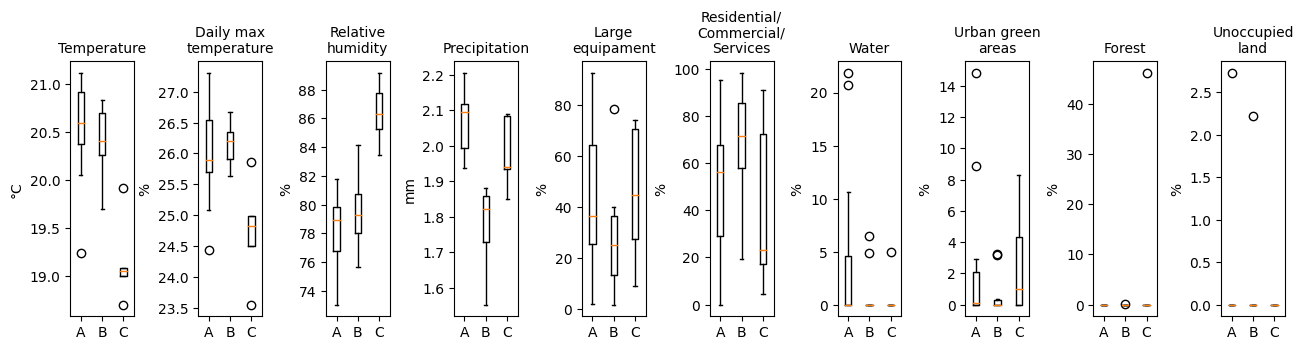

In [104]:
vars = list(df_grouped_boxplot.drop("cluster", axis=1).columns)

fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(13.5, 3))
p = 0

for i in vars:
    # Lista com os grupos de dados
    
    dados = [
        df_grouped_boxplot[df_grouped_boxplot.cluster == "A"][i], 
        df_grouped_boxplot[df_grouped_boxplot.cluster == "B"][i], 
        df_grouped_boxplot[df_grouped_boxplot.cluster == "C"][i]
        ]

    # Nomes dos grupos
    nomes_grupos = ['A', 'B', 'C']

    # Criar o boxplot
    axs[p].boxplot(dados, labels=nomes_grupos)

    # Adicionar título e rótulos dos eixos
    parameter = i

    if parameter == "Relative humidity":
        parameter = "Relative\nhumidity"
    elif parameter == "Large equipament":
        parameter = "Large\nequipament"
    elif parameter == "Residential/Commercial/Services":
        parameter = "Residential/\nCommercial/\nServices"
    elif parameter == "Urban green areas":
        parameter = "Urban green\nareas"
    elif parameter == "Unoccupied land":
        parameter = "Unoccupied\nland"
    elif parameter == "Daily max temperature":
        parameter = "Daily max\ntemperature"

    axs[p].set_title(f'{parameter}', fontdict={'fontsize': 10})
    axs[p].set_xlabel('')
    
    if parameter == "Precipitation":
        ylabel = "mm"
    elif parameter == "Temperature":
        ylabel = "°C"
    else:
        ylabel = "%"
    
    axs[p].set_ylabel(ylabel)

    p += 1

fig.subplots_adjust(
    left=0.08, 
    right=0.98, 
    bottom=0.05, 
    top=0.9,
    wspace=1
)

plt.savefig(f'../figures/boxplot_clusters_parameters.png', dpi=300, bbox_inches="tight")
plt.show()

In [105]:
df_cluster_A

timestamp         station_name  precipitation_lag_1H  \
0       2012-08-14 15:00:00              Anhembi                   0.0   
1       2012-08-14 15:00:00              Butantã                   0.0   
2       2012-08-14 15:00:00                 Lapa                   0.0   
3       2012-08-14 15:00:00                Mooca                   0.0   
4       2012-08-14 15:00:00          Santo Amaro                   0.0   
...                     ...                  ...                   ...   
757023  2019-02-18 22:00:00  São Miguel Paulista                   0.0   
757024  2019-02-18 22:00:00                   Sé                   0.0   
757025  2019-02-18 22:00:00         Vila Formosa                   0.0   
757026  2019-02-18 22:00:00         Vila Mariana                   0.0   
757027  2019-02-18 22:00:00        Vila Prudente                   0.0   

        temperature_lag_1H  relative_humidity_lag_1H  pressure_lag_1H  \
0                      NaN                       NaN              NaN   
1                      NaN                       NaN              NaN   
2                      NaN                       NaN              NaN   
3                      NaN                       NaN              NaN   
4                      NaN                       NaN              NaN   
...                    ...                       ...              ...   
757023           24.057167                 81.191667       928.175000   
757024           24.953500                 82.466000       916.911667   
757025           23.179000                 98.840833       926.375000   
757026           23.958000                 80.763000       918.461667   
757027           23.363833                 83.502833       924.101667   

        wind_velocity_x_lag_1H  wind_velocity_y_lag_1H  wind_blow_x_lag_1H  \
0                          NaN                     NaN                 NaN   
1                          NaN                     NaN                 NaN   
2                          NaN                     NaN                 NaN   
3                          NaN                     NaN                 NaN   
4                          NaN                     NaN                 NaN   
...                        ...                     ...                 ...   
757023                     NaN                     NaN                 NaN   
757024               -1.993963                1.470847           -3.058473   
757025                     NaN                     NaN                 NaN   
757026               -0.112860               -0.487360           -1.426960   
757027                0.278243               -0.495857            0.515230   

        wind_blow_y_lag_1H  temperature_rural  
0                      NaN            18.5780  
1                      NaN            18.5780  
2                      NaN            18.5780  
3                      NaN            18.5780  
4                      NaN            18.5780  
...                    ...                ...  
757023                 NaN            20.7402  
757024            2.339249            20.7402  
757025                 NaN            20.7402  
757026           -0.663201            20.7402  
757027           -2.115334            20.7402  

[757028 rows x 11 columns]

In [106]:
def revert_lag(df, cols):
    df[cols] = df[cols].shift(-1)
    return df

In [107]:
def apply_revert_lags(df, cols):
    dfs = []
    for i in df.station_name.unique():
        dfi = df[df.station_name == i]
        dfi = revert_lag(dfi, cols)
        dfs.append(dfi)
    return pd.concat(dfs)

In [108]:
cols = [
    "precipitation_lag_1H",
    "temperature_lag_1H",
    "relative_humidity_lag_1H",
    "pressure_lag_1H",
    "wind_velocity_x_lag_1H",
    "wind_velocity_y_lag_1H",
    "wind_blow_x_lag_1H",
    "wind_blow_y_lag_1H"
    ]


df_cluster_A = apply_revert_lags(df=df_cluster_A, cols=cols)
df_cluster_B = apply_revert_lags(df=df_cluster_B, cols=cols)
df_cluster_C = apply_revert_lags(df=df_cluster_C, cols=cols)

/tmp/ipykernel_5081/1133768500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].shift(-1)
/tmp/ipykernel_5081/1133768500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols] = df[cols].shift(-1)
/tmp/ipykernel_5081/1133768500.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexi

In [109]:
def calculate_uhii(df):
    df['uhii'] = df.temperature_lag_1H - df.temperature_rural
    return df

In [110]:
df_cluster_A = calculate_uhii(df=df_cluster_A)
df_cluster_B = calculate_uhii(df=df_cluster_B)
df_cluster_C = calculate_uhii(df=df_cluster_C)

In [111]:
# def plots_quant(df, cluster_name):
#     df['quantile'] = pd.qcut(df['uhii'], q=4, labels=['1st', '2nd', '3rd', '4th'])
#     for i in list(df.drop(["timestamp", "station_name", 'quantile'], axis=1).columns):
#         sns.kdeplot(data=df, x=i, bw_method='scott', kernel='gau', shade=True, hue="quantile")
#         plt.grid()
#         # plt.savefig(f'../figures/kde_{cluster_name}_{i}.png', dpi=300, bbox_inches="tight")
#         plt.show()

In [112]:
# plots_quant(df_cluster_A, "Cluster A")

In [113]:

# plots_quant(df_cluster_B, "Cluster B")

In [114]:
# plots_quant(df_cluster_C, "Cluster C")

In [115]:
# df_cluster_A['timestamp'] = pd.to_datetime(df_cluster_A['timestamp'])
# df_cluster_A_grouped = df_cluster_A[["timestamp", "uhii"]].groupby("timestamp").mean()
# df_cluster_A_grouped = df_cluster_A_grouped.reset_index()
# df_cluster_A_grouped = df_cluster_A_grouped.dropna()
# df_cluster_A_grouped

In [116]:
# def uhii_cumsum(df, feature_name):
#     df['timestamp'] = pd.to_datetime(df['timestamp'])
#     df_grouped = df[["timestamp", "uhii"]].groupby("timestamp").mean()
#     df_grouped['uhii_5'] = df_grouped["uhii"] >= 5
#     df_grouped['uhii_5'] = df_grouped['uhii_5'].map({False: 0, True:1})
#     annual_cumulative_sum = df_grouped[['uhii_5']].resample('Y').sum()
#     annual_cumulative_sum.columns = [feature_name]
#     return annual_cumulative_sum

In [117]:
# cluster_A_cumsum = uhii_cumsum(df=df_cluster_A, feature_name='Cluster A')
# cluster_B_cumsum = uhii_cumsum(df=df_cluster_B, feature_name='Cluster B')
# cluster_C_cumsum = uhii_cumsum(df=df_cluster_C, feature_name='Cluster C')


In [118]:
# clusters_cumsum = cluster_A_cumsum.merge(
#     cluster_B_cumsum, left_index=True, right_index=True
#     ).merge(cluster_C_cumsum, left_index=True, right_index=True)

# clusters_cumsum.index = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [119]:
# clusters_cumsum = clusters_cumsum.loc[2013:2018]
# clusters_cumsum

In [120]:
# plt.plot(
#     clusters_cumsum.index, clusters_cumsum[['Cluster A']],  
#     marker="^", 
#     ms=7, 
#     label='Cluster A',
#     mfc='none',
#     mec='red',
#     c='green',
#     ls=''
# )

# plt.plot(
#     clusters_cumsum.index, clusters_cumsum[['Cluster B']],
#     marker="s",
#     ms=7,
#     label='Cluster B',
#     mfc='none',
#     mec='deepskyblue',
#     c='red',
#     ls=''
# )

# plt.plot(
#     clusters_cumsum.index, clusters_cumsum[['Cluster C']],
#     marker="o",
#     ms=7,
#     label='Cluster C',
#     mfc='none',
#     mec='lime',
#     c='blue',
#     ls=''
# )

# plt.xlabel('')
# plt.ylabel('$\sum\ (UHII\ hours > 5°C)$')
# plt.title('Yearly UHII hours > 5°C sum')
# plt.grid()
# plt.legend(prop={'size': 10})
# plt.savefig(f'../figures/uhii_hours_sum.png', dpi=300, bbox_inches="tight")
# plt.show()

In [121]:
# def negative_island_hours_sum(df, feature_name):
#     df['timestamp'] = pd.to_datetime(df['timestamp'])
#     df_grouped = df[["timestamp", "uhii"]].groupby("timestamp").mean()
#     df_grouped['uhii_under5'] = df_grouped["uhii"] <= -5
#     df_grouped['uhii_under5'] = df_grouped['uhii_under5'].map({False: 0, True:1})
#     annual_sum = df_grouped[['uhii_under5']].resample('Y').sum()
#     annual_sum.columns = [feature_name]
#     return annual_sum

In [122]:
# cluster_A_neg_sum = negative_island_hours_sum(df=df_cluster_A, feature_name='Cluster A')
# cluster_B_neg_sum = negative_island_hours_sum(df=df_cluster_B, feature_name='Cluster B')
# cluster_C_neg_sum = negative_island_hours_sum(df=df_cluster_C, feature_name='Cluster C')


In [123]:
# clusters_neg_sum = cluster_A_neg_sum.merge(
#     cluster_B_neg_sum, left_index=True, right_index=True
#     ).merge(cluster_C_neg_sum, left_index=True, right_index=True)

# clusters_neg_sum.index = [2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [124]:
# clusters_neg_sum = clusters_neg_sum.loc[2013:2018]
# clusters_neg_sum

In [125]:
# plt.plot(
#     clusters_neg_sum.index, clusters_neg_sum[['Cluster A']],  
#     marker="^", 
#     ms=7, 
#     label='Cluster A',
#     mfc='none',
#     mec='red',
#     c='green',
#     ls=''
# )

# plt.plot(
#     clusters_neg_sum.index, clusters_neg_sum[['Cluster B']],
#     marker="s",
#     ms=7,
#     label='Cluster B',
#     mfc='none',
#     mec='deepskyblue',
#     c='red',
#     ls=''
# )

# plt.plot(
#     clusters_neg_sum.index, clusters_neg_sum[['Cluster C']],
#     marker="o",
#     ms=7,
#     label='Cluster C',
#     mfc='none',
#     mec='lime',
#     c='blue',
#     ls=''
# )

# plt.xlabel('')
# plt.ylabel('$\sum\ (Delta \ temp. hours < -5°C)$')
# plt.title('Yearly negative delta temp. hours < -5°C sum')
# plt.grid()
# plt.legend(prop={'size': 10})
# plt.savefig(f'../figures/negative_temperature_hours_sum.png', dpi=300, bbox_inches="tight")
# plt.show()

In [132]:
df_cluster_A_2 = df_cluster_A[df_cluster_A.uhii >= 0]
df_cluster_B_2 = df_cluster_B[df_cluster_B.uhii >= 0]
df_cluster_C_2 = df_cluster_C[df_cluster_C.uhii >= 0]

df_cluster_A_2['timestamp'] = pd.to_datetime(df_cluster_A_2['timestamp'])
df_cluster_B_2['timestamp'] = pd.to_datetime(df_cluster_B_2['timestamp'])
df_cluster_C_2['timestamp'] = pd.to_datetime(df_cluster_C_2['timestamp'])

def periodo_dia(x):
  if x >=6 and x < 18:
    return 'Day'
  else:
    return 'Night'

df_cluster_A_2['hour'] = df_cluster_A_2['timestamp'].dt.hour
df_cluster_A_2['day_period'] = df_cluster_A_2['hour'].apply(periodo_dia)

df_cluster_B_2['hour'] = df_cluster_B_2['timestamp'].dt.hour
df_cluster_B_2['day_period'] = df_cluster_B_2['hour'].apply(periodo_dia)

df_cluster_C_2['hour'] = df_cluster_C_2['timestamp'].dt.hour
df_cluster_C_2['day_period'] = df_cluster_C_2['hour'].apply(periodo_dia)

def seasons(x):
  if x in [1, 2, 3]:
    return 'Summer'
  elif x in [4, 5, 6]:
    return 'Autumn'
  elif x in [7, 8, 9]:
    return 'Winter'
  elif x in [10, 11, 12]:
    return 'Spring'

df_cluster_A_2['month'] = df_cluster_A_2['timestamp'].dt.month
df_cluster_A_2['seasons'] = df_cluster_A_2.month.apply(seasons)
df_cluster_A_2['cluster'] = 'A'

df_cluster_B_2['month'] = df_cluster_B_2['timestamp'].dt.month
df_cluster_B_2['seasons'] = df_cluster_B_2.month.apply(seasons)
df_cluster_B_2['cluster'] = 'B'

df_cluster_C_2['month'] = df_cluster_C_2['timestamp'].dt.month
df_cluster_C_2['seasons'] = df_cluster_C_2.month.apply(seasons)
df_cluster_C_2['cluster'] = 'C'

df_uhii = pd.concat([df_cluster_A_2, df_cluster_B_2, df_cluster_C_2])

/tmp/ipykernel_5081/2756484747.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_A_2['timestamp'] = pd.to_datetime(df_cluster_A_2['timestamp'])
/tmp/ipykernel_5081/2756484747.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_B_2['timestamp'] = pd.to_datetime(df_cluster_B_2['timestamp'])
/tmp/ipykernel_5081/2756484747.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [133]:
df_uhii[df_uhii.uhii > 20]

timestamp         station_name  precipitation_lag_1H  \
222238 2015-11-02 18:00:00  Santana do Parnaíba              2.600000   
227748 2015-11-25 17:00:00  Santana do Parnaíba              1.000000   
67983  2013-10-28 06:00:00           Vila Maria              2.250000   
67991  2013-10-28 07:00:00           Vila Maria              2.250000   
67999  2013-10-28 08:00:00           Vila Maria              2.250000   
68007  2013-10-28 09:00:00           Vila Maria              2.250000   
68015  2013-10-28 10:00:00           Vila Maria              0.375000   
68023  2013-10-28 11:00:00           Vila Maria              0.000000   
68031  2013-10-28 12:00:00           Vila Maria              0.000000   
68039  2013-10-28 13:00:00           Vila Maria              0.000000   
68047  2013-10-28 14:00:00           Vila Maria              0.000000   
68055  2013-10-28 15:00:00           Vila Maria              0.000000   
68063  2013-10-28 16:00:00           Vila Maria              0.000000   
68071  2013-10-28 17:00:00           Vila Maria              0.000000   
68079  2013-10-28 18:00:00           Vila Maria              0.000000   
68087  2013-10-28 19:00:00           Vila Maria              0.000000   
68095  2013-10-28 20:00:00           Vila Maria              0.000000   
260813 2018-08-26 15:00:00        Riacho Grande              0.600000   
260818 2018-08-26 16:00:00        Riacho Grande              0.600000   
262078 2018-09-06 04:00:00        Riacho Grande              2.600000   
262083 2018-09-06 05:00:00        Riacho Grande              2.600000   
262088 2018-09-06 06:00:00        Riacho Grande              2.600000   
262093 2018-09-06 07:00:00        Riacho Grande              2.600000   
262098 2018-09-06 08:00:00        Riacho Grande              2.600000   
262103 2018-09-06 09:00:00        Riacho Grande              2.600000   
263083 2018-09-14 13:00:00        Riacho Grande              8.933333   
263088 2018-09-14 14:00:00        Riacho Grande              9.733333   
263093 2018-09-14 15:00:00        Riacho Grande              9.800000   

        temperature_lag_1H  relative_humidity_lag_1H  pressure_lag_1H  \
222238           40.055167                 75.893333       931.331667   
227748           42.494000                 77.159000       932.431667   
67983            42.494000                 75.773000       928.063333   
67991            42.494000                 75.773000       928.158333   
67999            42.494000                 75.773000       928.578333   
68007            42.494000                 75.773000       928.973333   
68015            42.494000                 75.773000       927.401667   
68023            42.494000                 75.773000       929.398333   
68031            42.494000                 75.773000       928.851667   
68039            42.494000                 75.773000       928.096667   
68047            42.494000                 75.773000       929.553333   
68055            42.494000                 75.773000       930.683333   
68063            42.494000                 75.773000       929.178333   
68071            42.494000                 75.773000       927.830000   
68079            42.494000                 75.773000       927.453333   
68087            42.494000                 75.773000       927.868333   
68095            33.666500                 74.831167       929.303333   
260813           35.570333                 96.133667       928.525000   
260818           37.358000                 96.087000       927.871667   
262078           28.082000                 40.133000       925.628333   
262083           28.082000                 40.133000       925.256667   
262088           28.082000                 40.133000       924.753333   
262093           28.082000                 40.133000       925.165000   
262098           28.082000                 40.133000       925.365000   
262103           28.082000                 40.133000       925.910000   
2

In [134]:
def group_data(df):
    uhi_hour = df[['seasons', 'hour', 'uhii']]
    uhi_hour_grouped = uhi_hour.groupby(['seasons', 'hour']).agg(['mean', 'std'])
    uhi_hour_grouped = uhi_hour_grouped.reset_index()
    return uhi_hour_grouped

In [135]:
group_data(df_cluster_A_2)

seasons hour      uhii          
                     mean       std
0   Autumn    0  2.391347  1.190280
1   Autumn    1  2.308336  1.170433
2   Autumn    2  2.221913  1.150031
3   Autumn    3  2.133483  1.120073
4   Autumn    4  2.029248  1.087084
..     ...  ...       ...       ...
91  Winter   19  3.528704  2.427505
92  Winter   20  3.342821  1.980803
93  Winter   21  3.183482  1.776095
94  Winter   22  3.032219  1.680316
95  Winter   23  2.858189  1.589062

[96 rows x 4 columns]

In [136]:
# def uhii_seasons_hour(df):
#   fig, axs = plt.subplots(1, 4, figsize=(12,4), sharex=True, sharey=True)
#   fig.add_subplot(111, frameon=False)
#   plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#   plt.ylabel('{} °C'.format('$\Delta_{T_{Urban} - T_{Rural}}$'), size=15)
#   plt.xlabel('Hour', size=10)
#   plt.ylim(0, 8)

#   estacoes = ['Summer', 'Autumn', 'Winter', 'Spring'] 
#   idx = 0

#   for i in estacoes:
#     data_slice = df[df['seasons'] == i] 
#     axs[idx].plot(data_slice['hour'], data_slice[('uhii', 'mean')], color='red')
#     axs[idx].fill_between(data_slice['hour'], data_slice[('uhii', 'mean')] + data_slice[('uhii', 'std')], data_slice[('uhii', 'mean')] - data_slice[('uhii', 'std')], color='mistyrose')
#     axs[idx].set_title(i)
#     axs[idx].grid()
#     idx += 1

#   plt.tight_layout()
#   # plt.savefig('/content/gdrive/My Drive/uhi-ml/report/figures/intensidade_icu_hora_estacao.png')
#   plt.show()

In [137]:
# uhii_seasons_hour(group_data(df_cluster_A_2))

In [138]:
tercil = pd.DataFrame(df_cluster_A_2['uhii'].quantile([.33, .66, .99]))
tercil

uhii
0.33  1.507000
0.66  2.635333
0.99  7.587343

In [139]:
def get_tercile(x, tercile):
  if x <= tercile.iloc[0][0]:
    return '1st tercile'
  elif x > tercile.iloc[0][0] and x <= tercile.iloc[1][0]:
    return '2nd tercile'
  elif x > tercile.iloc[2][0]:
    return '3rd tercile'

df_cluster_A_2['tercile'] =  df_cluster_A_2['uhii'].apply(get_tercile, tercile=tercil)
df_cluster_A_2

/tmp/ipykernel_5081/3679525487.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster_A_2['tercile'] =  df_cluster_A_2['uhii'].apply(get_tercile, tercile=tercil)


timestamp station_name  precipitation_lag_1H  \
62345  2013-04-30 15:00:00      Anhembi                   0.0   
62369  2013-04-30 17:00:00      Anhembi                   0.0   
62381  2013-04-30 18:00:00      Anhembi                   0.0   
62393  2013-04-30 19:00:00      Anhembi                   0.0   
62405  2013-04-30 20:00:00      Anhembi                   0.0   
...                    ...          ...                   ...   
756946 2019-02-18 17:00:00    Pinheiros                   0.0   
756961 2019-02-18 18:00:00    Pinheiros                   0.0   
756976 2019-02-18 19:00:00    Pinheiros                   0.0   
756991 2019-02-18 20:00:00    Pinheiros                   0.0   
757006 2019-02-18 21:00:00    Pinheiros                   0.0   

        temperature_lag_1H  relative_humidity_lag_1H  pressure_lag_1H  \
62345            27.136000                 54.666000       935.360000   
62369            28.015167                 49.803000       935.025000   
62381            28.384333                 48.743000       935.416667   
62393            28.386000                 48.277167       936.108333   
62405            27.481500                 54.513500       937.258333   
...                    ...                       ...              ...   
756946           30.027667                 54.756500       926.671667   
756961           29.247167                 56.840833       925.920000   
756976           29.431667                 58.752500       925.808333   
756991           27.065000                 64.118833       925.980000   
757006           25.574500                 75.927833       926.808333   

        wind_velocity_x_lag_1H  wind_velocity_y_lag_1H  wind_blow_x_lag_1H  \
62345                -0.042953               -0.939018           -0.128858   
62369                 0.653754               -1.342004            1.204647   
62381                -0.268012               -0.717721           -0.095015   
62393                -0.305683               -0.183602           -1.463972   
62405                -0.806008                0.167429           -2.318677   
...                        ...                     ...                 ...   
756946                     NaN                     NaN                 NaN   
756961                     NaN                     NaN                 NaN   
756976                     NaN                     NaN                 NaN   
756991                     NaN                     NaN                 NaN   
757006                     NaN                     NaN                 NaN   

        wind_blow_y_lag_1H  temperature_rural      uhii  hour day_period  \
62345            -2.817054          27.132333  0.003667    15        Day   
62369            -3.306018          25.947000  2.068167    17        Day   
62381            -1.195158          25.354667  3.029667    18      Night   
62393            -0.999020          23.496667  4.889333    19      Night   
62405             0.048459          21.572833  5.908667    20      Night   
...                    ...                ...       ...   ...        ...   
756946                 NaN          27.979833  2.047833    17        Day   
756961                 NaN          24.683000  4.564167    18      Night   
756976                 NaN          23.723167  5.708500    19      Night   
756991                 NaN          22.447333  4.617667    20      Night   
757006                 NaN          21.134667  4.439833    21      Night   

        month seasons cluster      tercile  
62345       4  Autumn       A  1st tercile  
62369       4  Autumn       A  2nd tercile  
62381       4  Autumn       A         None  
62393       4  Autumn       A         None  
62405       4  Autumn       A         None  
...       ...     ...     ...          ...  
756946      2  Summer       A  2nd tercile  
756961      2  Summer       A         None  
756976      2  Summer       A         None  
756991      2  Summer       A         None  
757006      2 

In [140]:
df_cluster_A_2.columns = [
    'timestamp',
    'station_name',
    'Precipitation (mm)',
    'Temperature (°C)',
    'Relative humidity (%)',
    'Pressure (mb)',
    'Wind velocity x (m/s)',
    'Wind velocity y (m/s)',
    'Wind blow x (m/s)',
    'Wind blow y (m/s)',
    'Rural temperature (°C)',
    'uhii',
    'hour',
    'day_period',
    'month',
    'seasons',
    'tercile',
    'cluster'
    ]

In [141]:
df_cluster_A_2

timestamp station_name  Precipitation (mm)  Temperature (°C)  \
62345  2013-04-30 15:00:00      Anhembi                 0.0         27.136000   
62369  2013-04-30 17:00:00      Anhembi                 0.0         28.015167   
62381  2013-04-30 18:00:00      Anhembi                 0.0         28.384333   
62393  2013-04-30 19:00:00      Anhembi                 0.0         28.386000   
62405  2013-04-30 20:00:00      Anhembi                 0.0         27.481500   
...                    ...          ...                 ...               ...   
756946 2019-02-18 17:00:00    Pinheiros                 0.0         30.027667   
756961 2019-02-18 18:00:00    Pinheiros                 0.0         29.247167   
756976 2019-02-18 19:00:00    Pinheiros                 0.0         29.431667   
756991 2019-02-18 20:00:00    Pinheiros                 0.0         27.065000   
757006 2019-02-18 21:00:00    Pinheiros                 0.0         25.574500   

        Relative humidity (%)  Pressure (mb)  Wind velocity x (m/s)  \
62345               54.666000     935.360000              -0.042953   
62369               49.803000     935.025000               0.653754   
62381               48.743000     935.416667              -0.268012   
62393               48.277167     936.108333              -0.305683   
62405               54.513500     937.258333              -0.806008   
...                       ...            ...                    ...   
756946              54.756500     926.671667                    NaN   
756961              56.840833     925.920000                    NaN   
756976              58.752500     925.808333                    NaN   
756991              64.118833     925.980000                    NaN   
757006              75.927833     926.808333                    NaN   

        Wind velocity y (m/s)  Wind blow x (m/s)  Wind blow y (m/s)  \
62345               -0.939018          -0.128858          -2.817054   
62369               -1.342004           1.204647          -3.306018   
62381               -0.717721          -0.095015          -1.195158   
62393               -0.183602          -1.463972          -0.999020   
62405                0.167429          -2.318677           0.048459   
...                       ...                ...                ...   
756946                    NaN                NaN                NaN   
756961                    NaN                NaN                NaN   
756976                    NaN                NaN                NaN   
756991                    NaN                NaN                NaN   
757006                    NaN                NaN                NaN   

        Rural temperature (°C)      uhii  hour day_period  month seasons  \
62345                27.132333  0.003667    15        Day      4  Autumn   
62369                25.947000  2.068167    17        Day      4  Autumn   
62381                25.354667  3.029667    18      Night      4  Autumn   
62393                23.496667  4.889333    19      Night      4  Autumn   
62405                21.572833  5.908667    20      Night      4  Autumn   
...                        ...       ...   ...        ...    ...     ...   
756946               27.979833  2.047833    17        Day      2  Summer   
756961               24.683000  4.564167    18      Night      2  Summer   
756976               23.723167  5.708500    19      Night      2  Summer   
756991               22.447333  4.617667    20      Night      2  Summer   
757006               21.134667  4.439833    21      Night      2  Summer   

       tercile      cluster  
62345        A  1st tercile  
62369        A  2nd tercile  
62381        A         None  
62393        A         None  
62405        A         None  
...        ...          ...  
756946       A  2nd tercile  
756961       A         None  
756976       A         None  
756991       A         None  
757006       A         None  

[644495 rows x 18 columns]

In [142]:
# def uhii_terciles(df):
#   df = df.rename(columns={'uhii': "$\Delta_{T_{Urban} - T_{Rural}}$"})
#   for i in ['Summer', 'Autumn', 'Winter', 'Spring']:  
#       plt.subplots(figsize=(6, 6))
#       sns.kdeplot(df[(df['seasons'] == i) & (df['tercile'] == '1st tercile')]["$\Delta_{T_{Urban} - T_{Rural}}$"], bw_adjust=6, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
#       sns.kdeplot(df[(df['seasons'] == i) & (df['tercile'] == '2nd tercile')]["$\Delta_{T_{Urban} - T_{Rural}}$"], bw_adjust=6, label='2nd tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='lightcoral')
#       sns.kdeplot(df[(df['seasons'] == i) & (df['tercile'] == '3rd tercile')]["$\Delta_{T_{Urban} - T_{Rural}}$"], label='3rd tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='red')
#       plt.ylabel('Density')
#       plt.grid()
#       plt.legend()
#       plt.show()

# uhii_terciles(df=df_cluster_A_2)

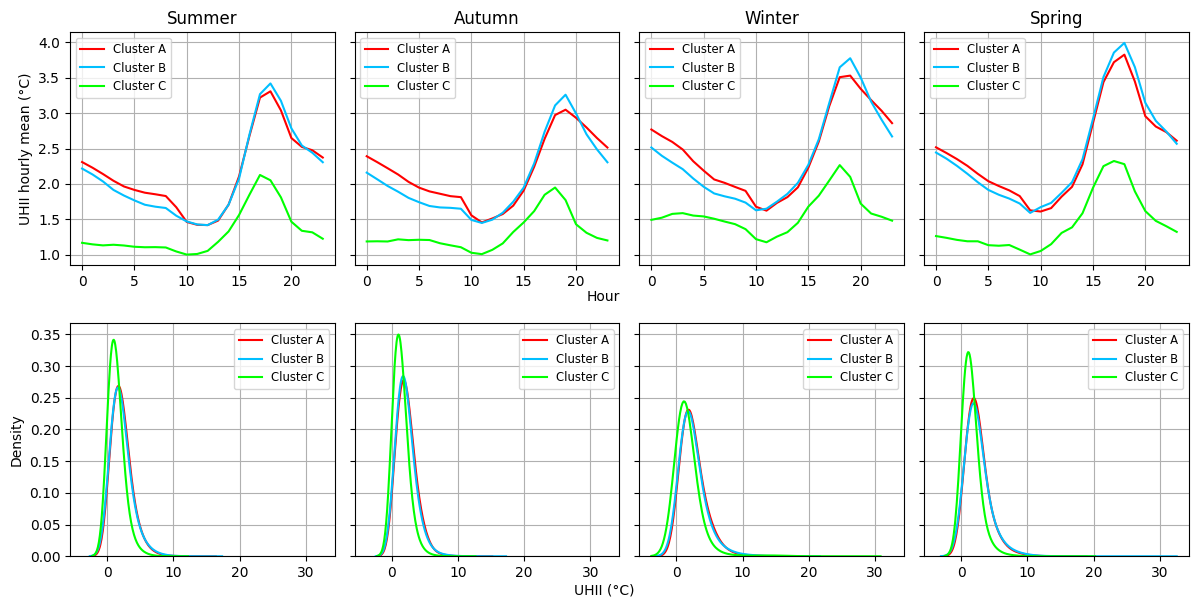

In [143]:
import seaborn as sns
import matplotlib.pyplot as plt

def uhii_clusters(df):
    fig, axs = plt.subplots(2, 4, figsize=(12,6), sharex='row', sharey='row')
    fig.subplots_adjust(bottom=0.2, hspace=1)

    estacoes = ['Summer', 'Autumn', 'Winter', 'Spring'] 

    idx = 0
    cluster_A_grouped = group_data(df[df.cluster == 'A'])
    cluster_B_grouped = group_data(df[df.cluster == 'B'])
    cluster_C_grouped = group_data(df[df.cluster == 'C'])
    axs[0, idx].set_ylabel('UHII hourly mean (°C)', size=10)
    for i in estacoes:
        data_slice_cluster_A = cluster_A_grouped[cluster_A_grouped['seasons'] == i]
        data_slice_cluster_B = cluster_B_grouped[cluster_B_grouped['seasons'] == i] 
        data_slice_cluster_C = cluster_C_grouped[cluster_C_grouped['seasons'] == i] 
        axs[0, idx].plot(data_slice_cluster_A['hour'], data_slice_cluster_A[('uhii', 'mean')], label='Cluster A', color='red')
        axs[0, idx].plot(data_slice_cluster_B['hour'], data_slice_cluster_B[('uhii', 'mean')], label='Cluster B', color='deepskyblue')
        axs[0, idx].plot(data_slice_cluster_C['hour'], data_slice_cluster_C[('uhii', 'mean')], label='Cluster C', color='lime')
        axs[0, idx].set_title(i)
        axs[0, idx].grid()
        axs[0, idx].set_xlabel(' ')
        axs[0, idx].legend(fontsize='small')
        idx += 1

    idx = 0
    for i in estacoes:  
        sns.kdeplot(df[(df['seasons'] == i) & (df['cluster'] == 'A')]['uhii'], bw_adjust=6, label='Cluster A', color='red', ax=axs[1, idx])
        sns.kdeplot(df[(df['seasons'] == i) & (df['cluster'] == 'B')]['uhii'], bw_adjust=6, label='Cluster B', color='deepskyblue', ax=axs[1, idx])
        sns.kdeplot(df[(df['seasons'] == i) & (df['cluster'] == 'C')]['uhii'], bw_adjust=6, label='Cluster C', color='lime', ax=axs[1, idx])
        axs[1, idx].grid()
        axs[1, idx].set_xlabel('')
        axs[1, idx].legend(fontsize='small')
        idx += 1

    # Adiciona rótulos de eixo x centralizados
    fig.text(0.5, 0.49, 'Hour', ha='center')
    fig.text(0.5, 0.0, 'UHII (°C)', ha='center')

    plt.tight_layout()
    plt.show()


uhii_clusters(df_uhii)

In [ ]:
Para

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


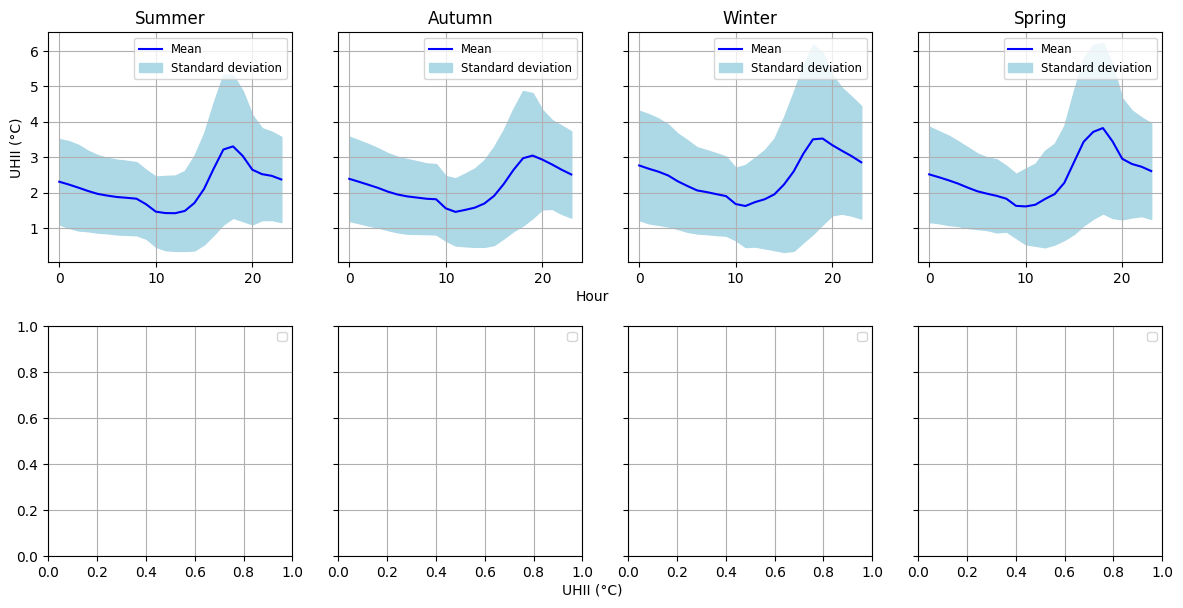

In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

def uhii_seasons_hour(df):
    fig, axs = plt.subplots(2, 4, figsize=(12,6), sharex='row', sharey='row')
    fig.subplots_adjust(bottom=0.2, hspace=1)

    estacoes = ['Summer', 'Autumn', 'Winter', 'Spring'] 

    idx = 0
    df1 = group_data(df_cluster_A_2)
    axs[0, idx].set_ylabel('UHII (°C)', size=10)
    for i in estacoes:
        data_slice = df1[df1['seasons'] == i] 
        axs[0, idx].plot(data_slice['hour'], data_slice[('uhii', 'mean')], label='Mean', color='blue')
        axs[0, idx].fill_between(data_slice['hour'], data_slice[('uhii', 'mean')] + data_slice[('uhii', 'std')], data_slice[('uhii', 'mean')] - data_slice[('uhii', 'std')], label='Standard deviation', color='lightblue')
        axs[0, idx].set_title(i)
        axs[0, idx].grid()
        axs[0, idx].set_xlabel(' ')
        axs[0, idx].legend(fontsize='small')
        idx += 1

    idx = 0
    df = df.rename(columns={'uhii': "$\Delta_{T_{Urban} - T_{Rural}}$"})
    for i in estacoes:  
        sns.kdeplot(df[(df['seasons'] == i) & (df['tercile'] == '1st tercile')]["$\Delta_{T_{Urban} - T_{Rural}}$"], bw_adjust=6, label='1st tercile', color='mistyrose', ax=axs[1, idx])
        sns.kdeplot(df[(df['seasons'] == i) & (df['tercile'] == '2nd tercile')]["$\Delta_{T_{Urban} - T_{Rural}}$"], bw_adjust=6, label='2nd tercile', color='lightcoral', ax=axs[1, idx])
        sns.kdeplot(df[(df['seasons'] == i) & (df['tercile'] == '3rd tercile')]["$\Delta_{T_{Urban} - T_{Rural}}$"], label='3rd tercile', color='red', ax=axs[1, idx])
        axs[1, idx].grid()
        axs[1, idx].set_xlabel('')
        axs[1, idx].legend(fontsize='small')
        idx += 1

    # Adiciona rótulos de eixo x centralizados
    fig.text(0.5, 0.49, 'Hour', ha='center')
    fig.text(0.5, 0.0, 'UHII (°C)', ha='center')

    plt.tight_layout()
    plt.show()


uhii_seasons_hour(df_cluster_A_2)

In [145]:
def uhii_terciles_parameters(df):
  for k in ['Precipitation (mm)', 'Temperature (°C)', 'Relative humidity (%)', 'Pressure (mb)', 'Wind velocity x (m/s)', 'Wind velocity y (m/s)', 'Wind blow x (m/s)', 'Wind blow y (m/s)', 'Rural temperature (°C)']:
    for i in list(df.seasons.unique()):
      for j in list(df.day_period.unique()):    
        plt.subplots(figsize=(6, 6))
        sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
        sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '2nd tercile')][k], hist=False, label='2nd tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='lightcoral')
        sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '3rd tercile')][k], hist=False, label='3rd tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='red')
        plt.ylabel('Density')
        plt.grid()
        plt.legend()
        plt.title('{} / {} / {}'.format(k, i, j))
        plt.show()

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

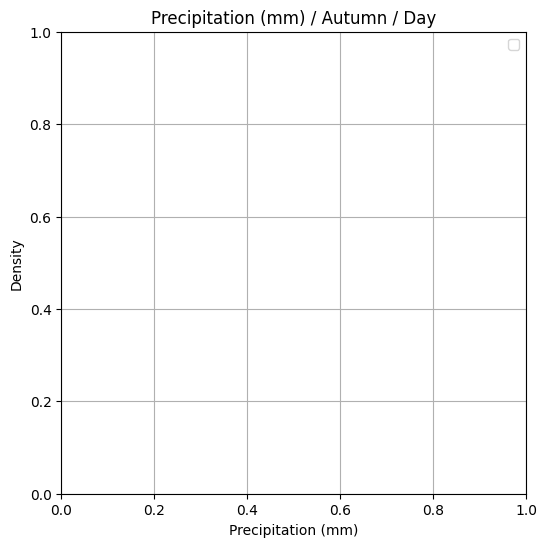

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

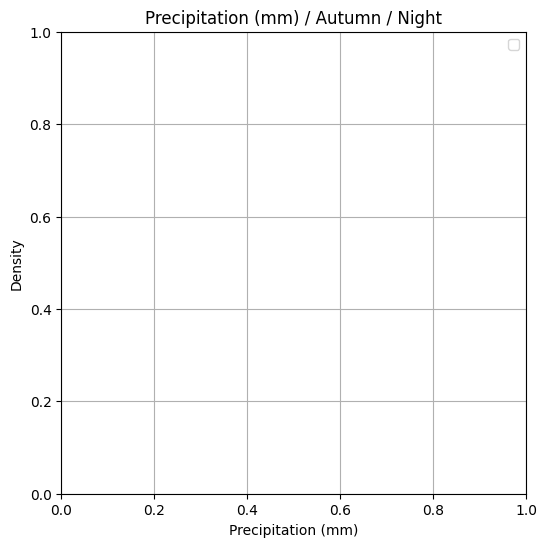

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

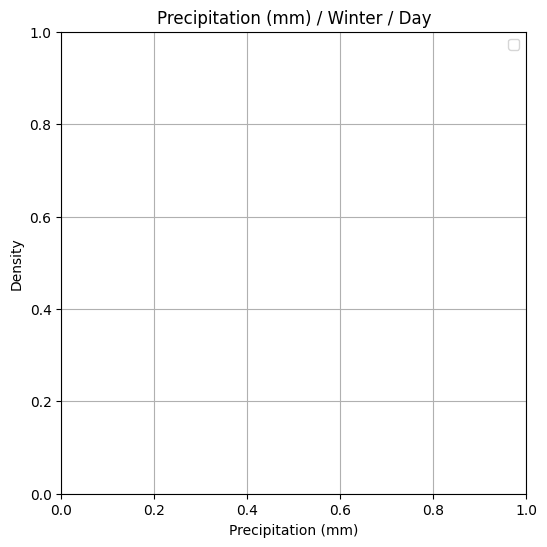

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

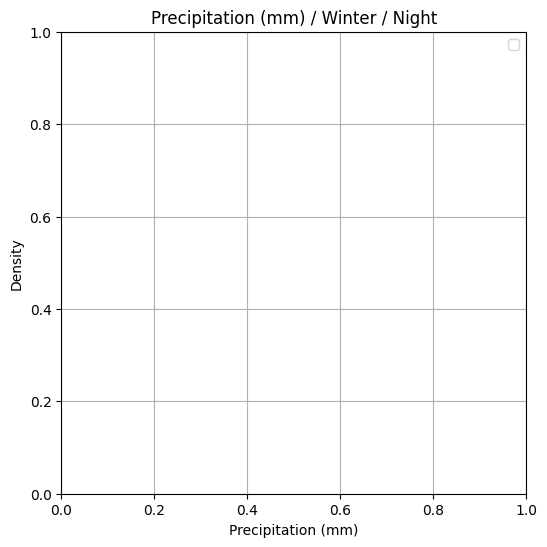

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

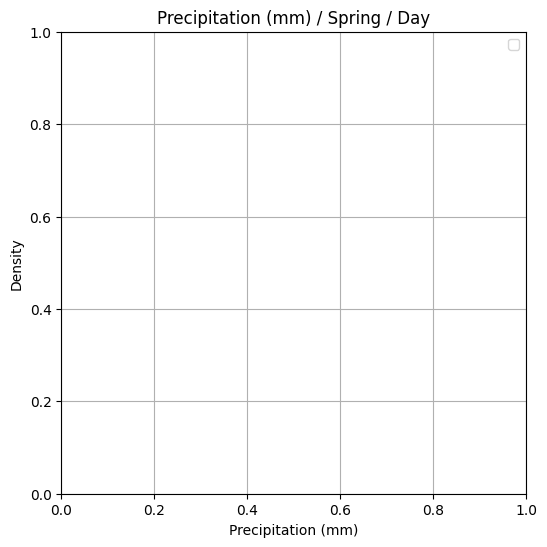

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

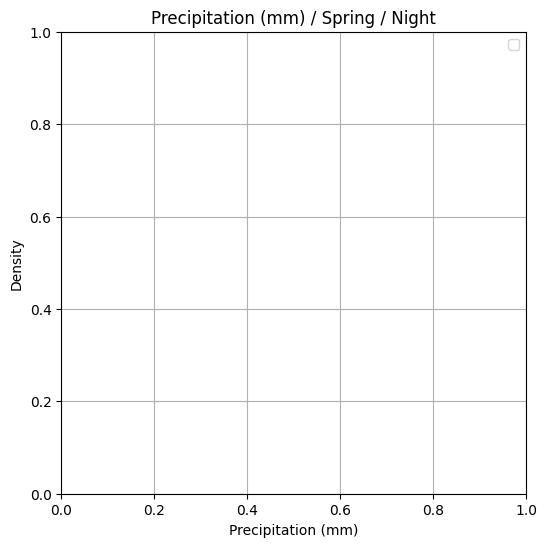

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

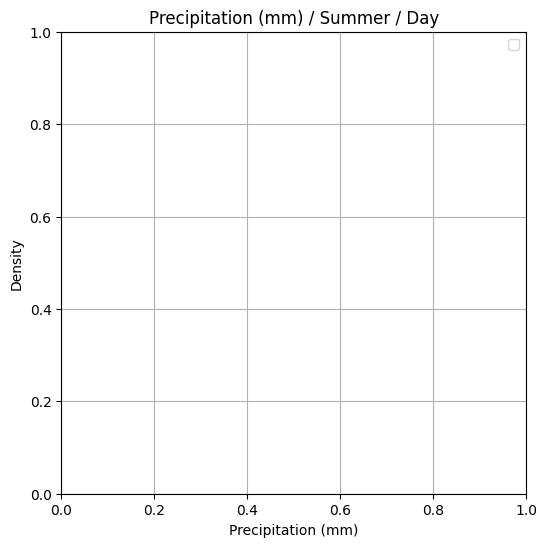

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

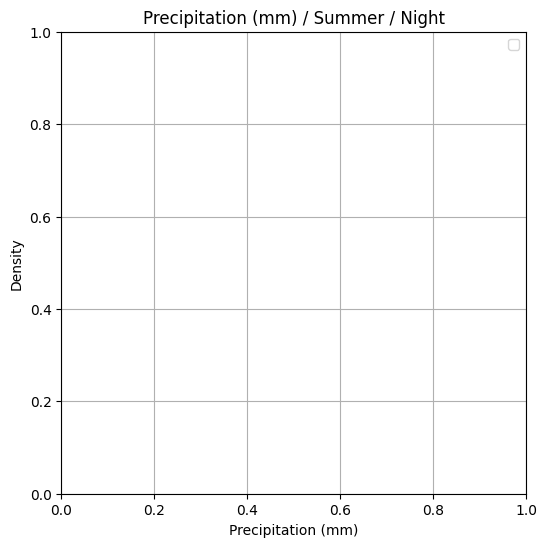

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

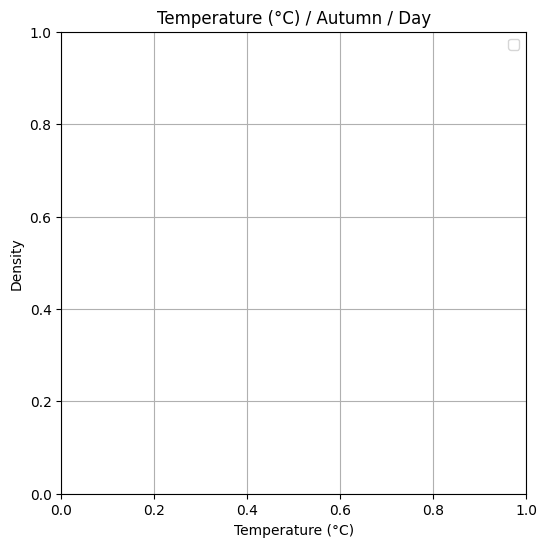

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

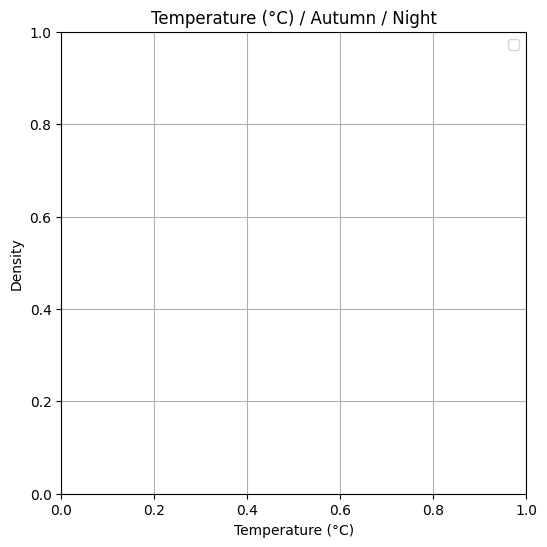

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

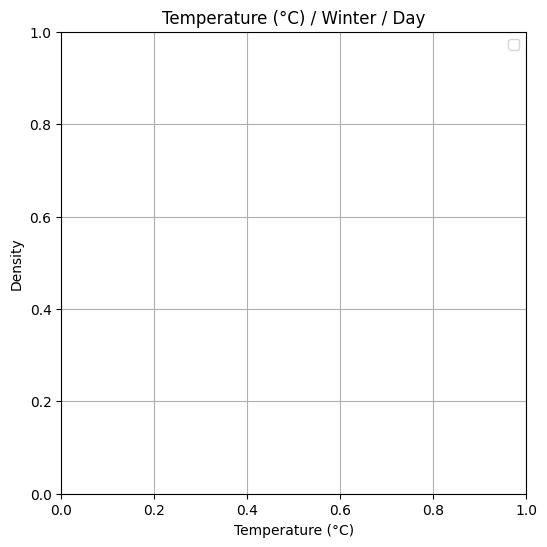

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

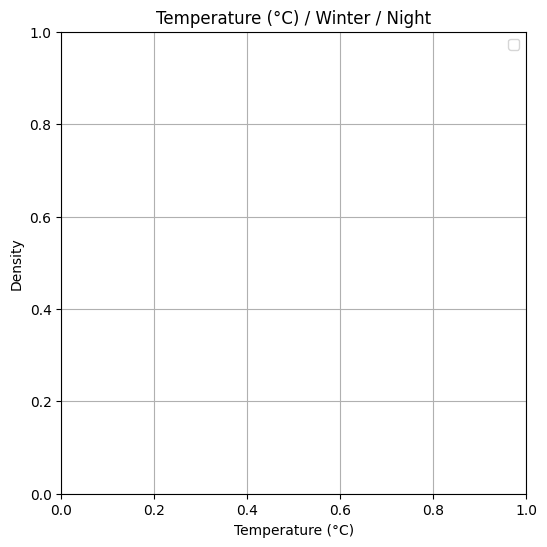

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

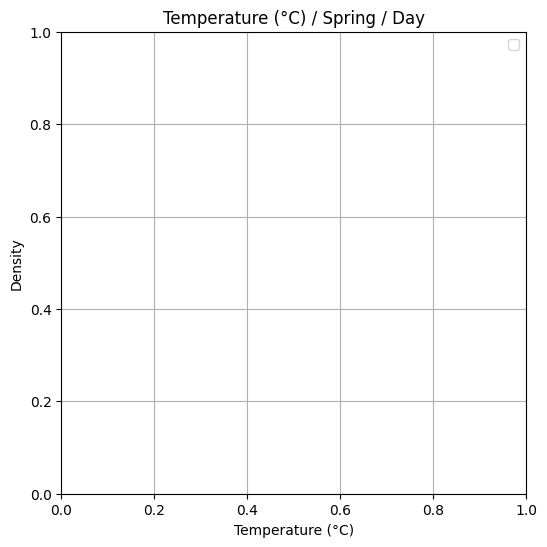

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

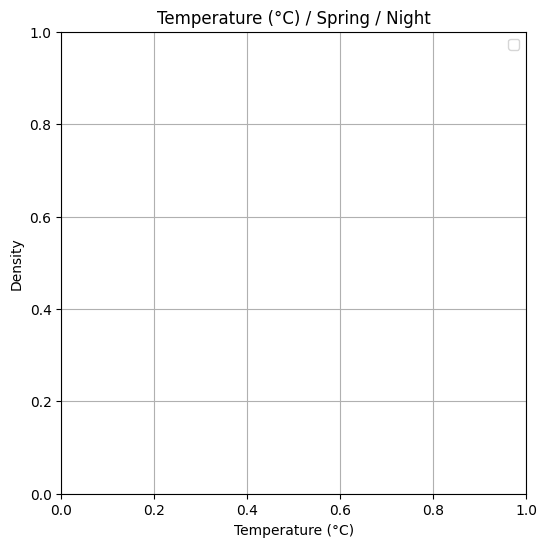

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

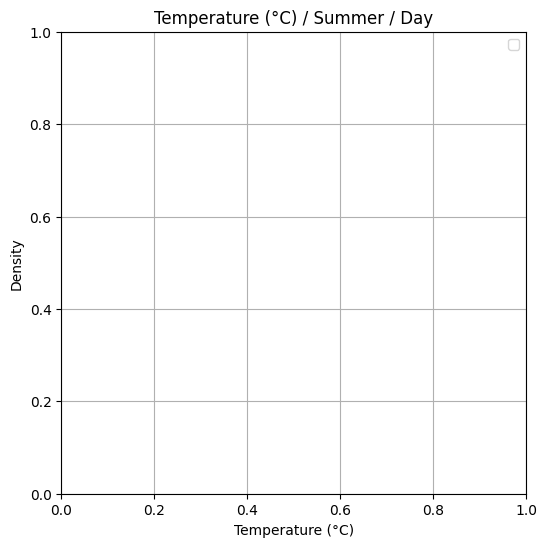

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

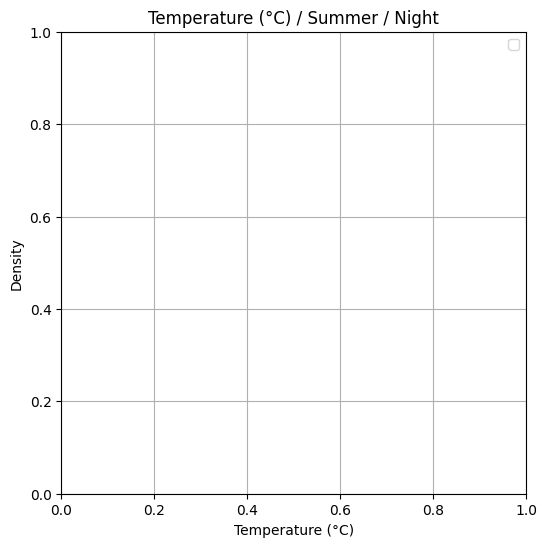

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

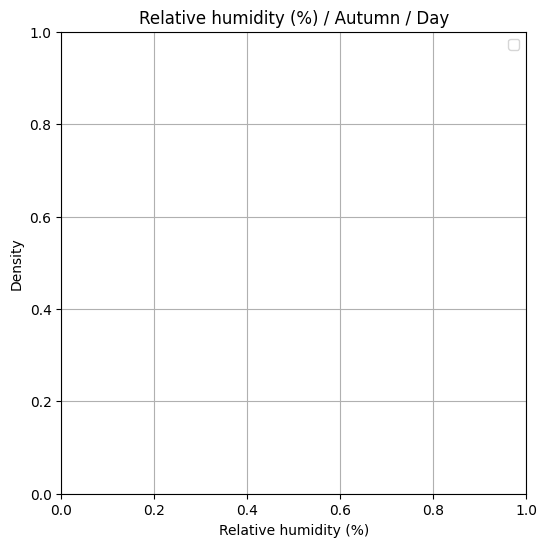

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

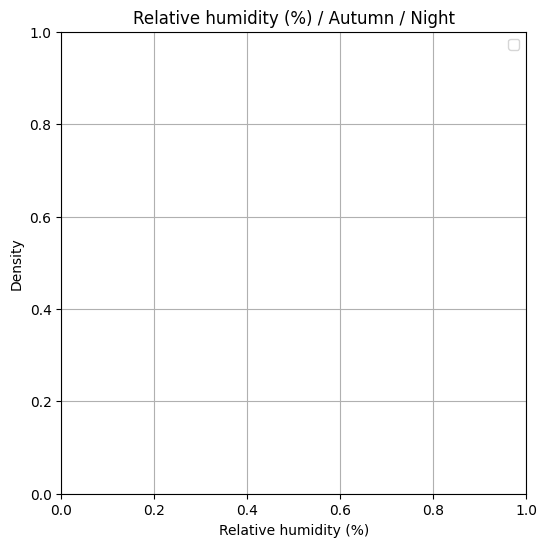

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

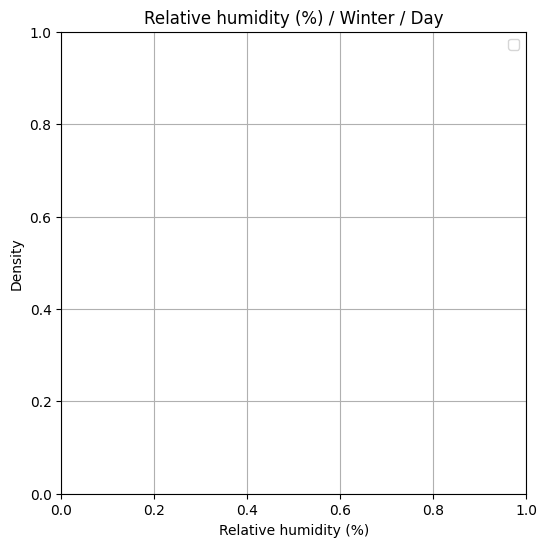

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

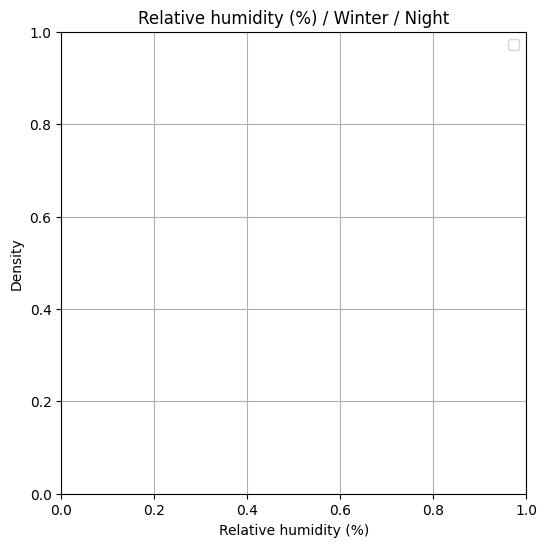

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

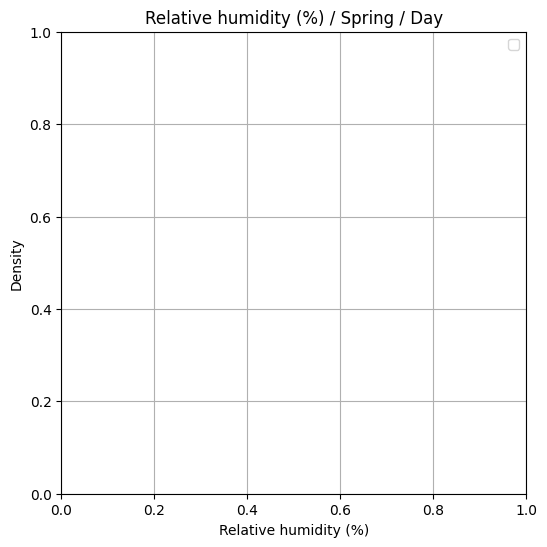

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

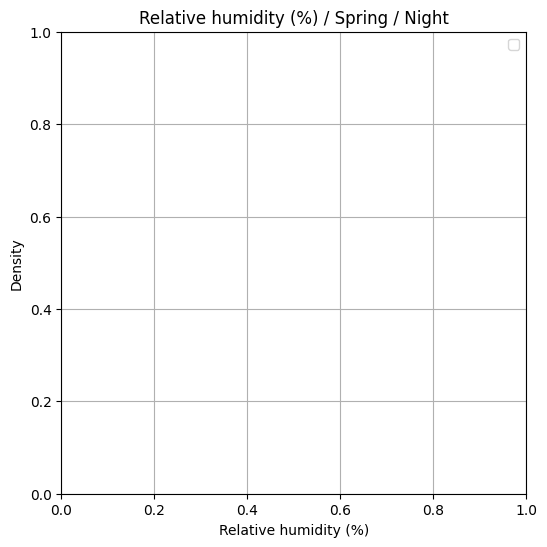

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

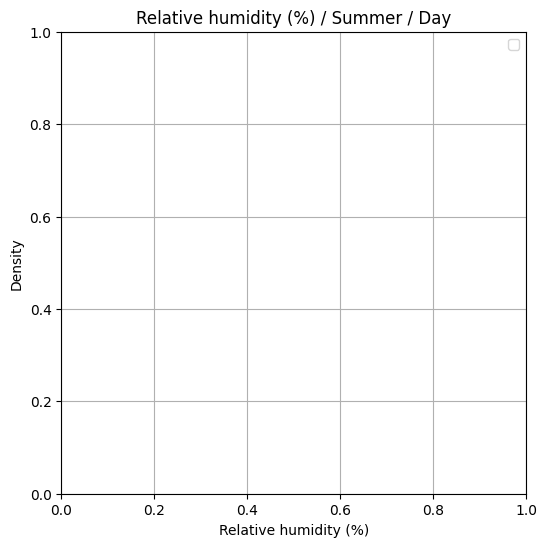

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

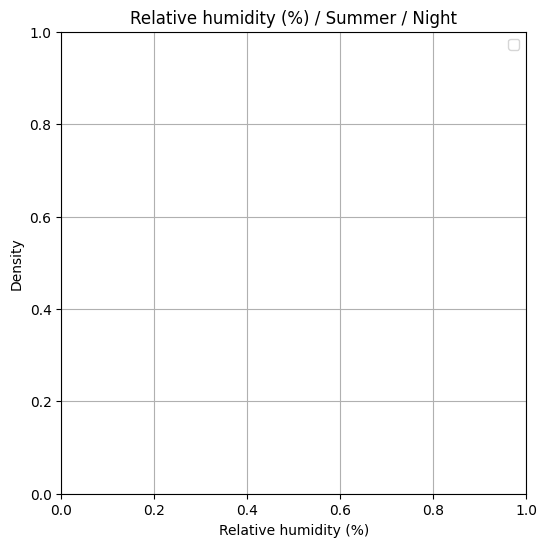

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

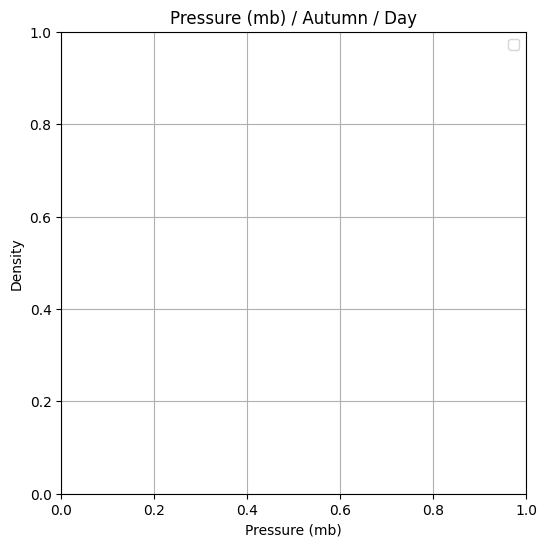

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

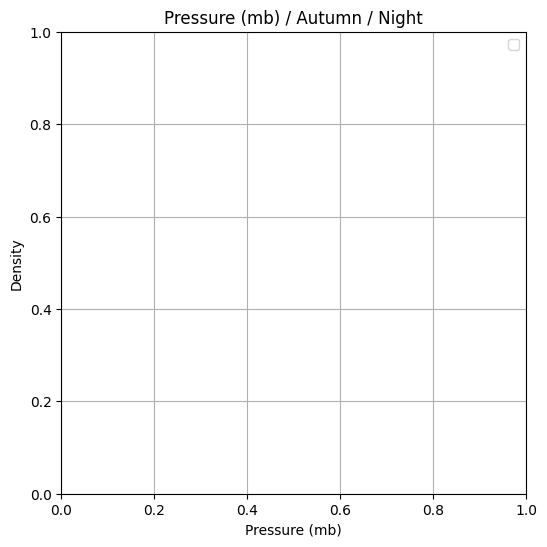

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

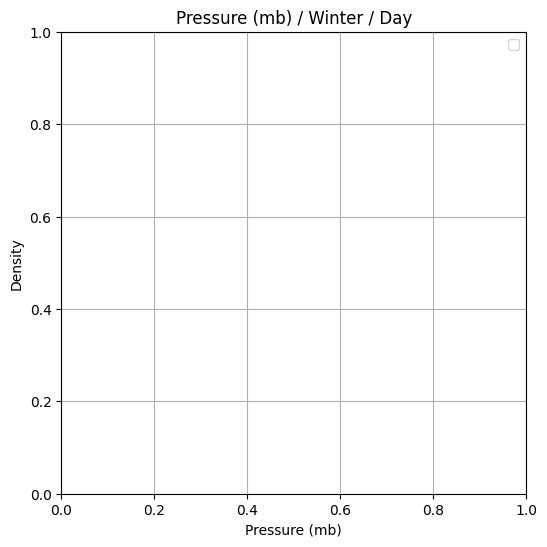

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

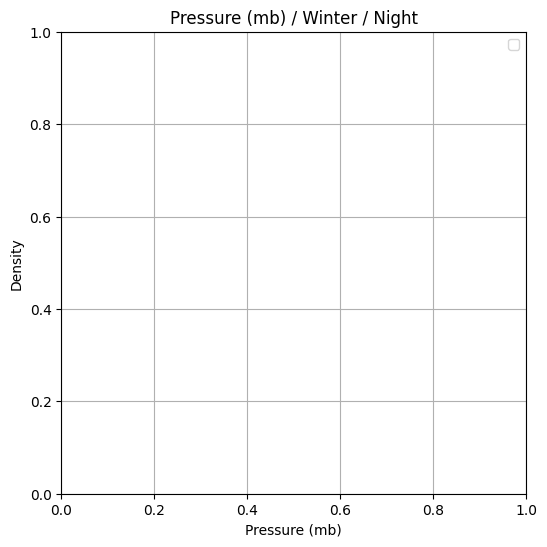

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

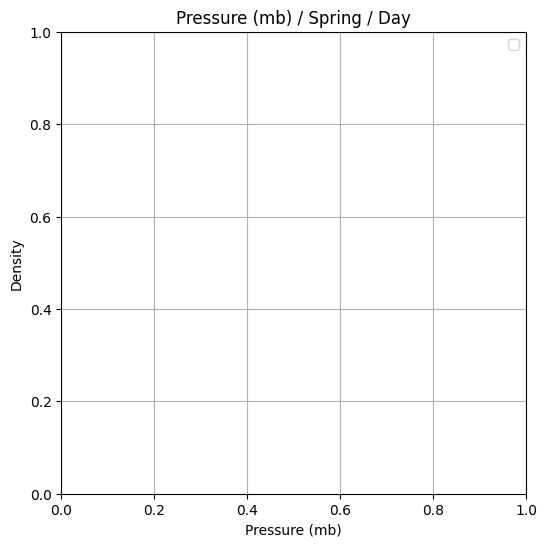

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

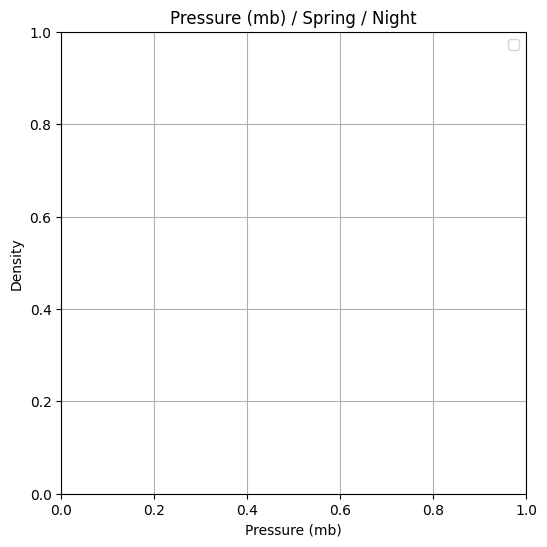

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

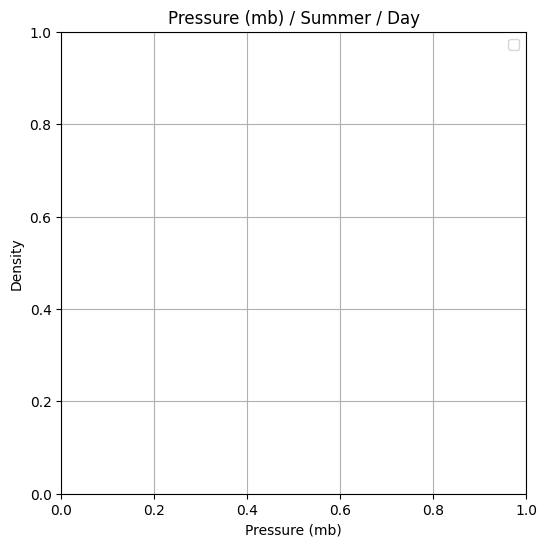

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

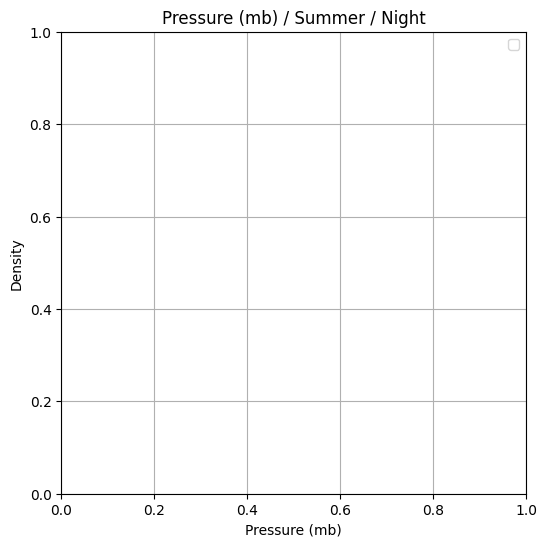

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

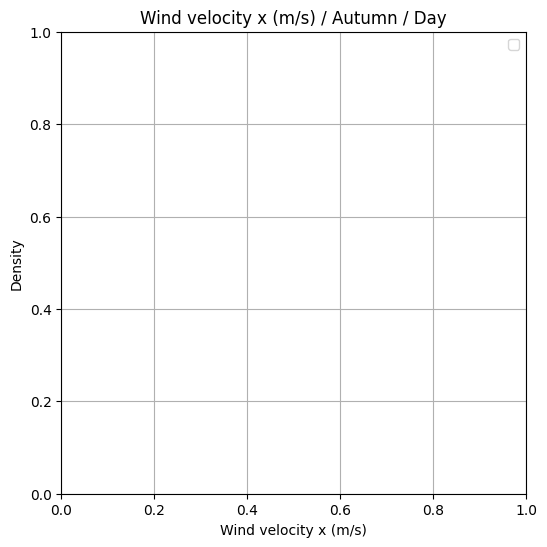

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

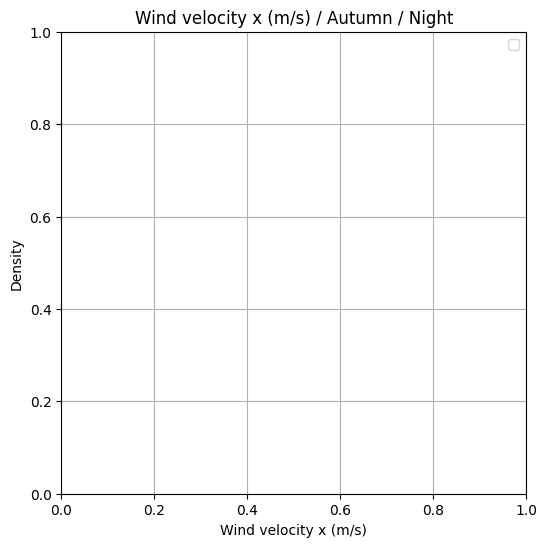

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

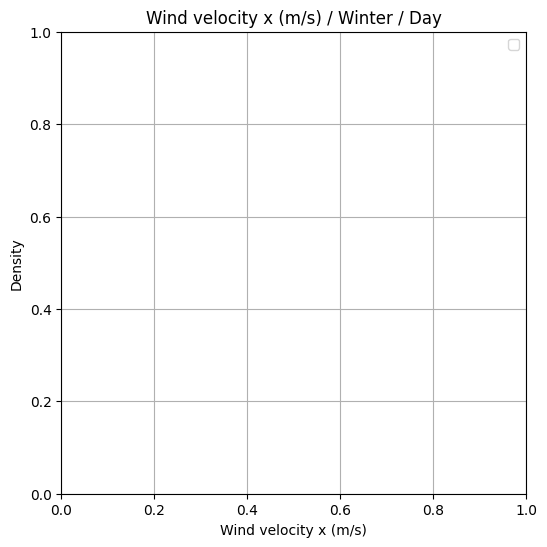

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

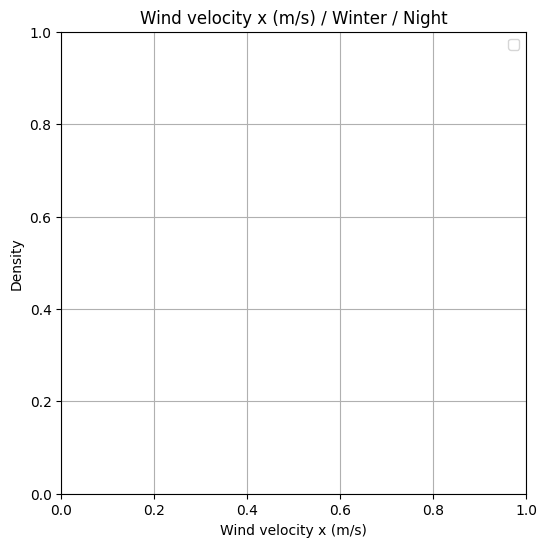

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

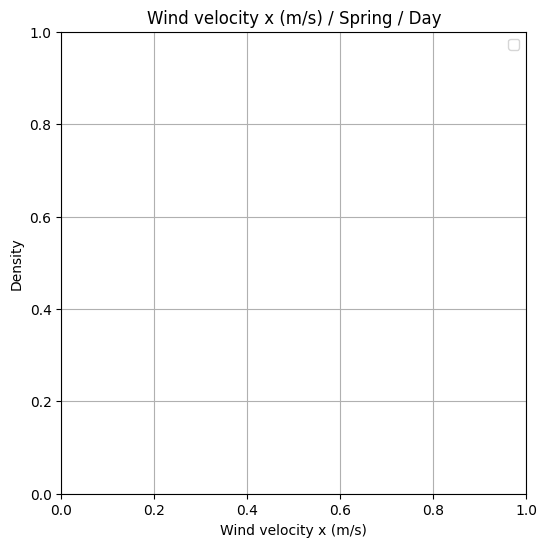

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

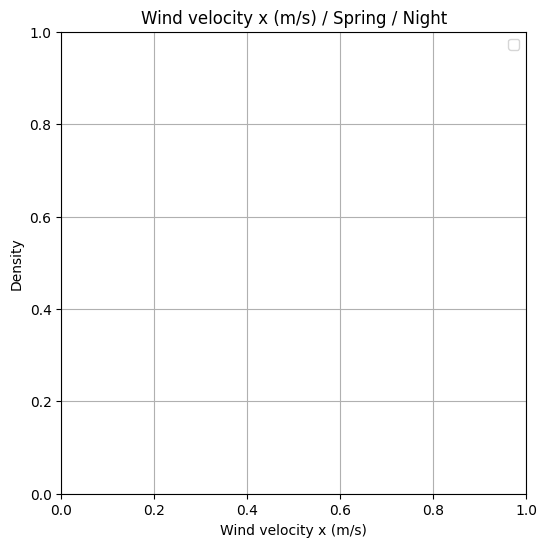

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

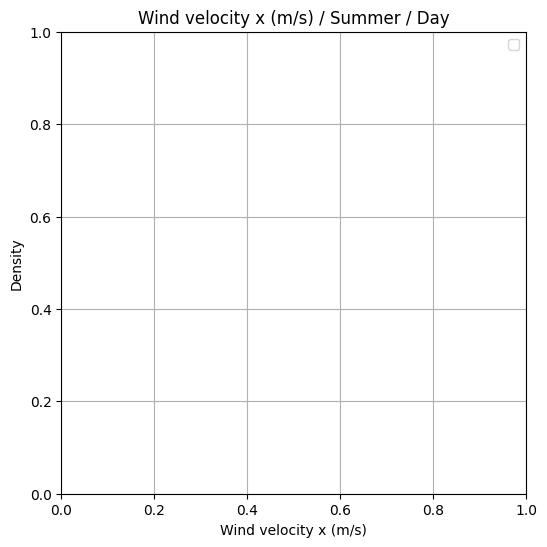

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

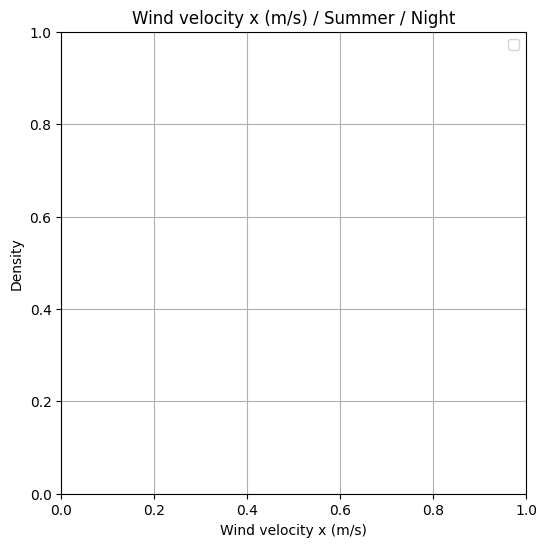

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

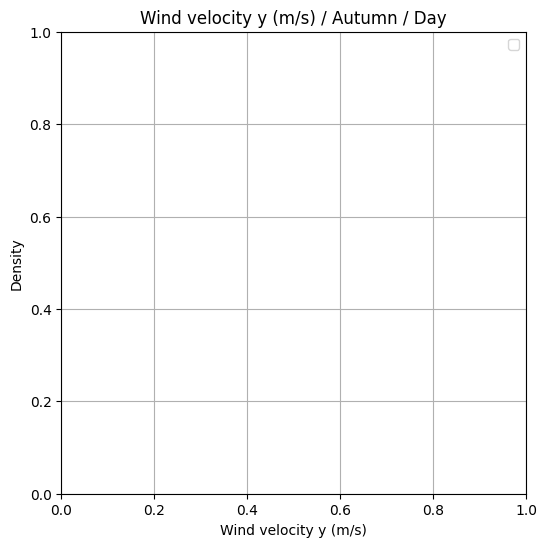

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

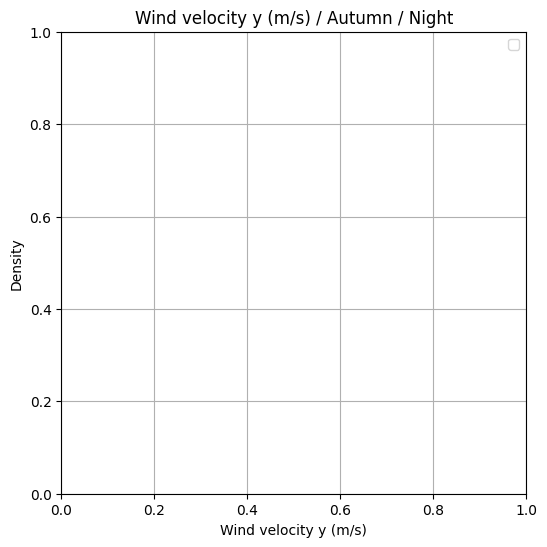

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

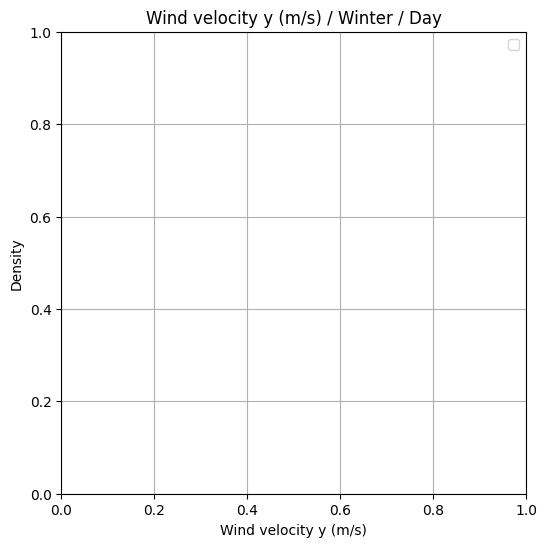

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

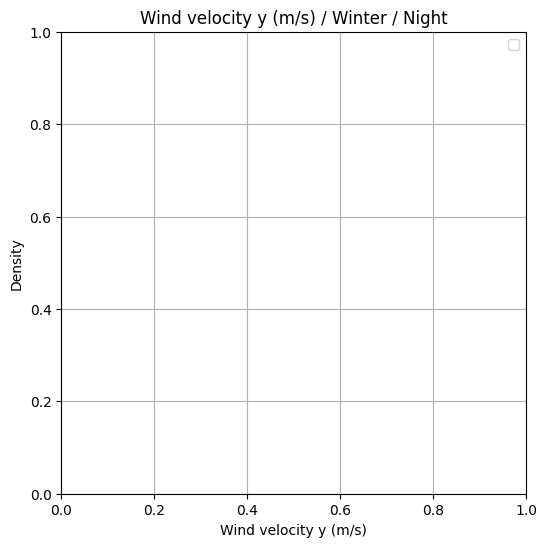

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

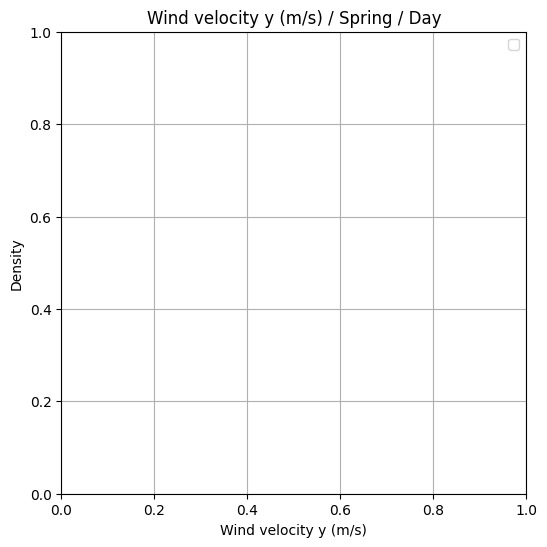

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

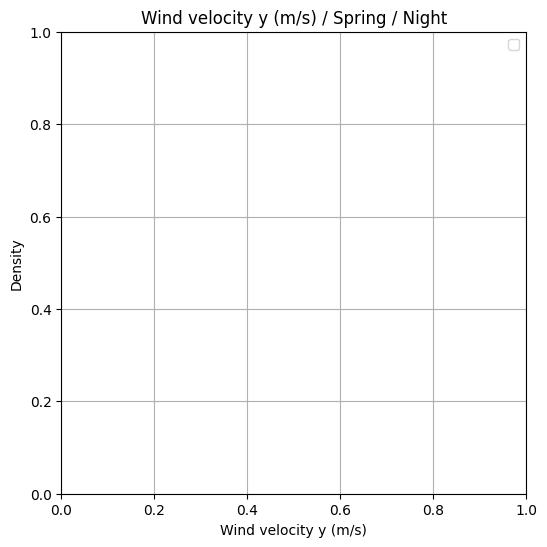

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

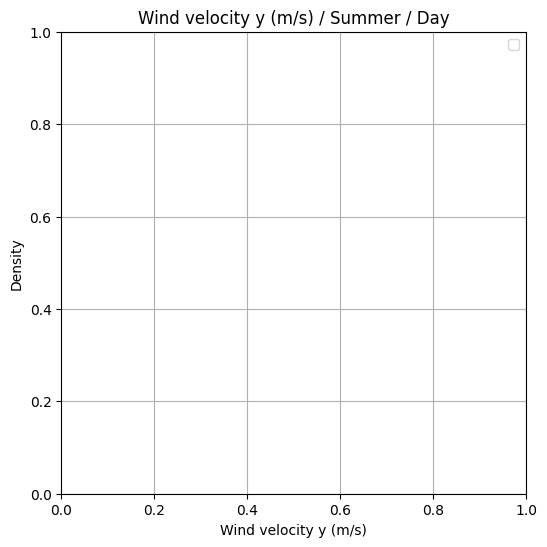

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

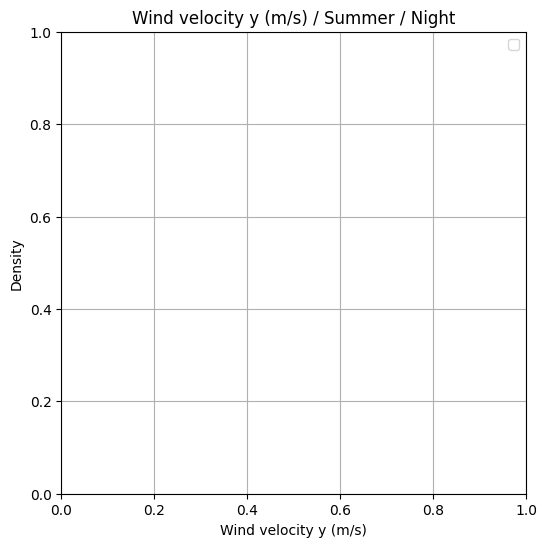

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

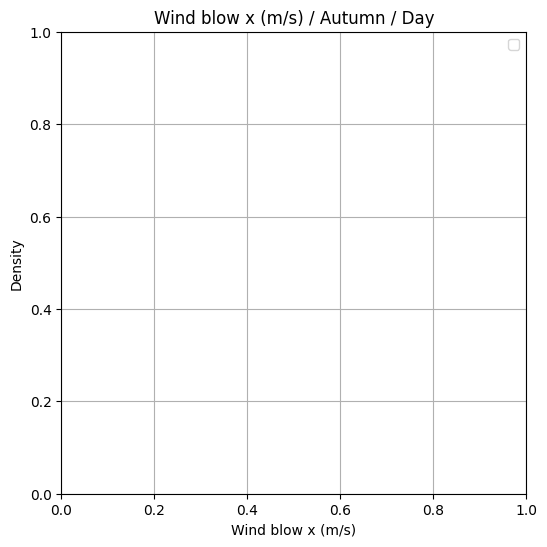

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

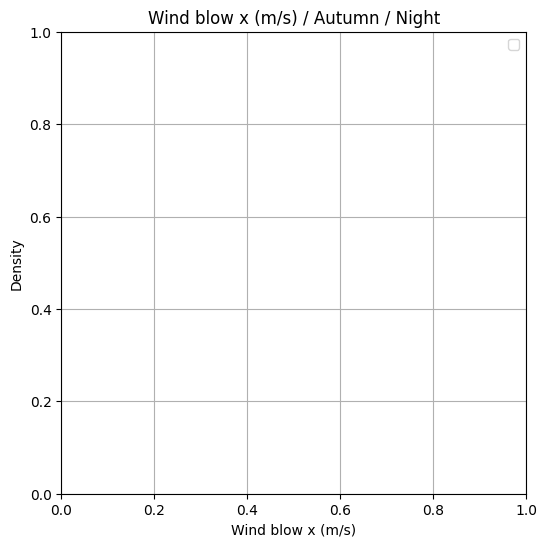

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

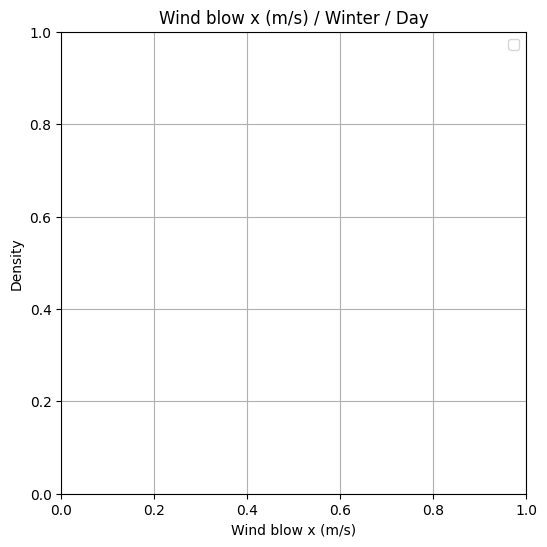

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

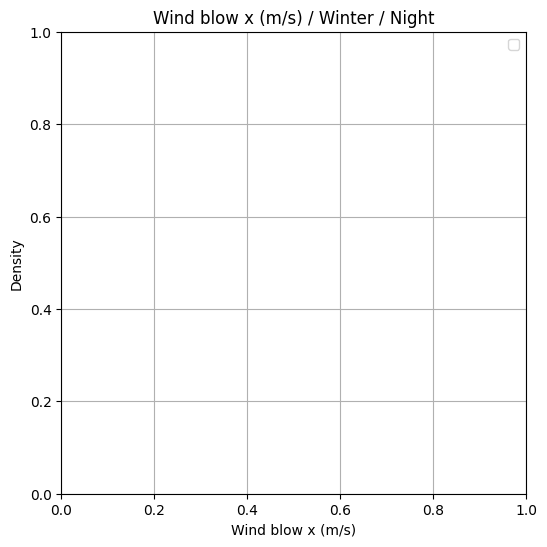

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

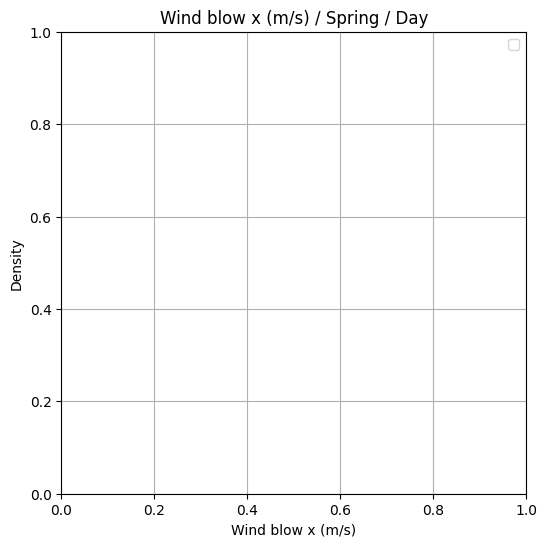

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

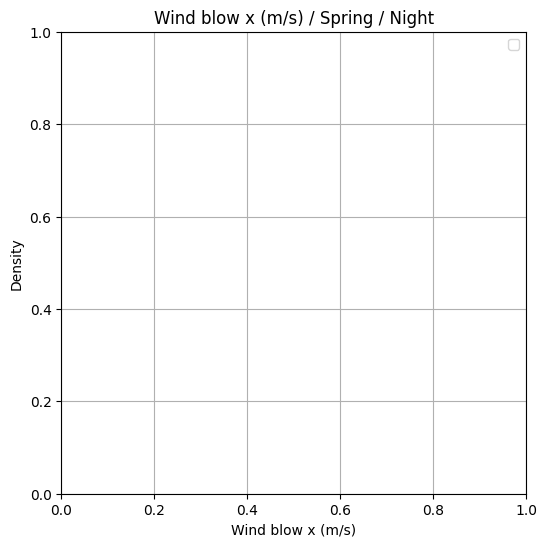

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

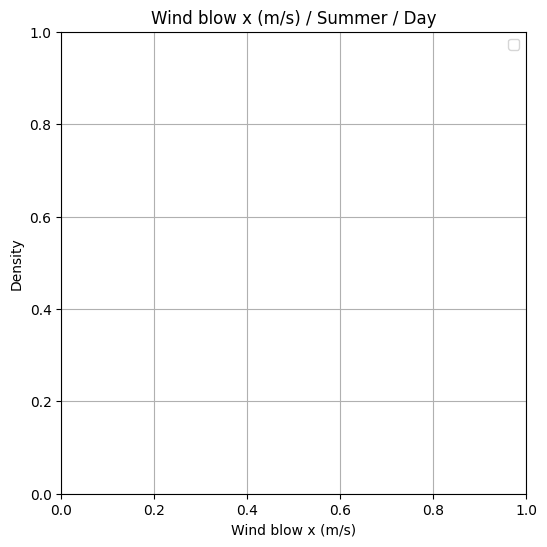

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

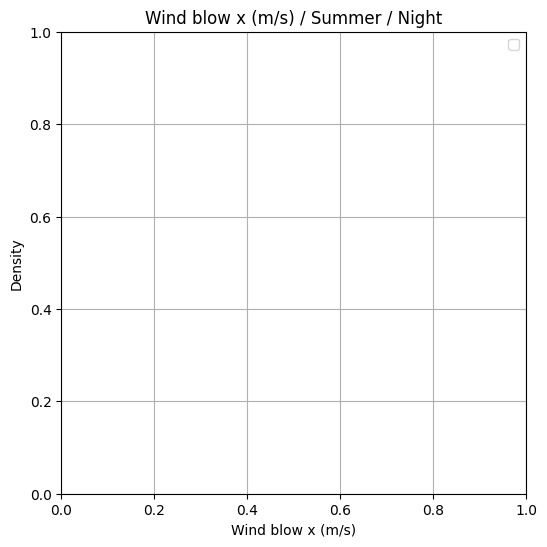

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

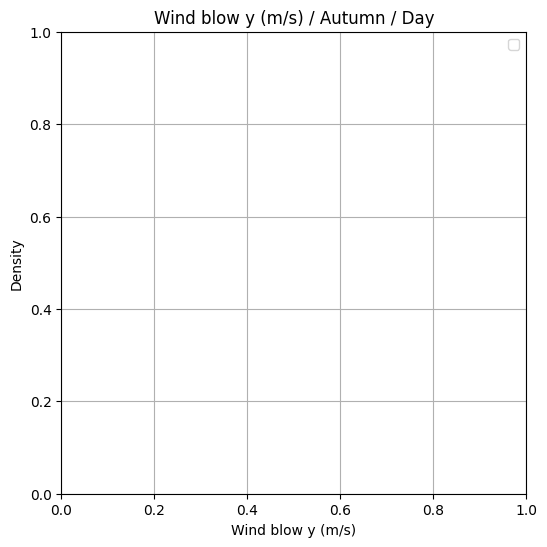

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

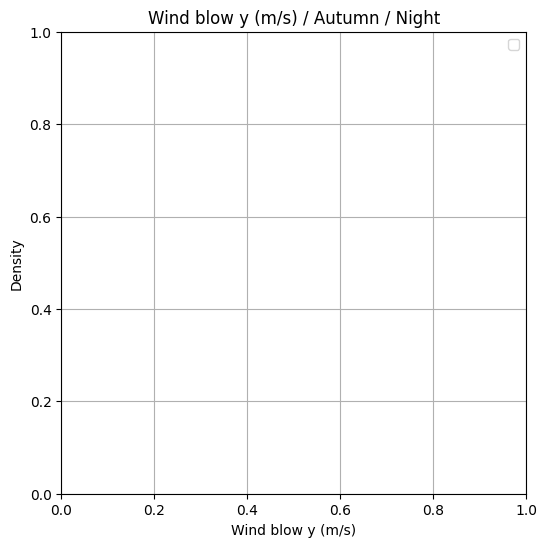

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

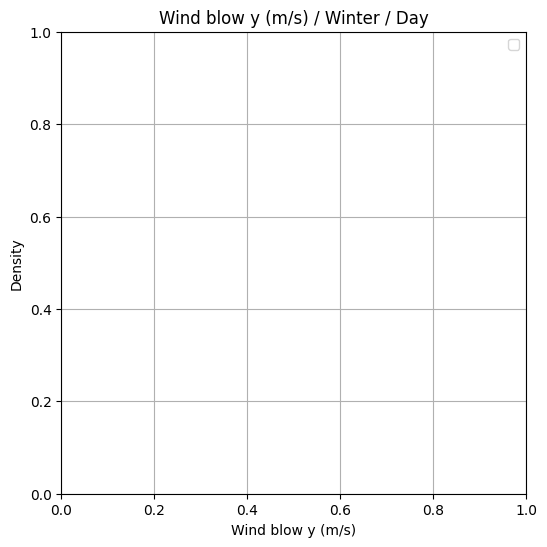

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

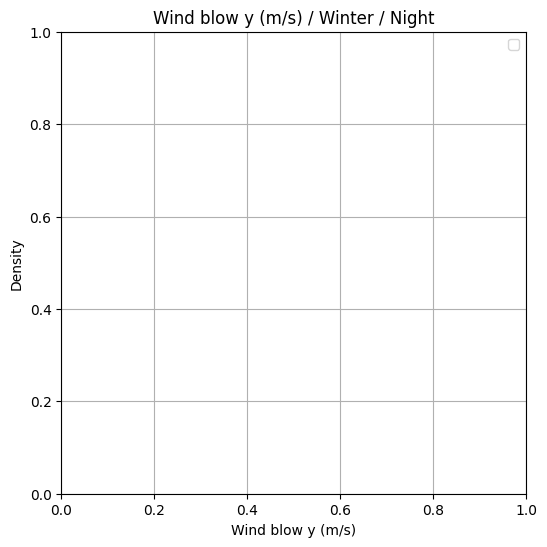

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

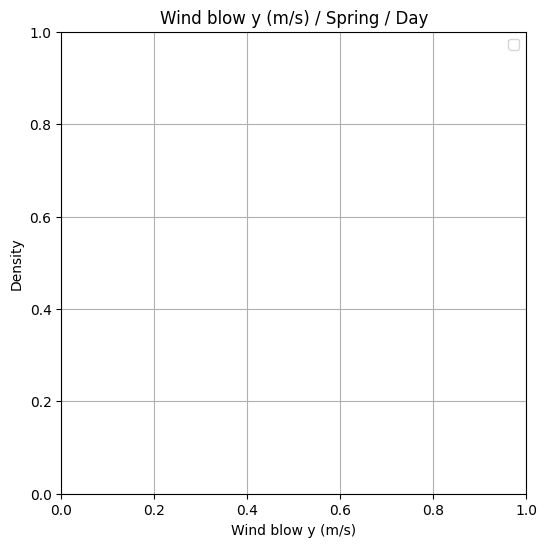

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

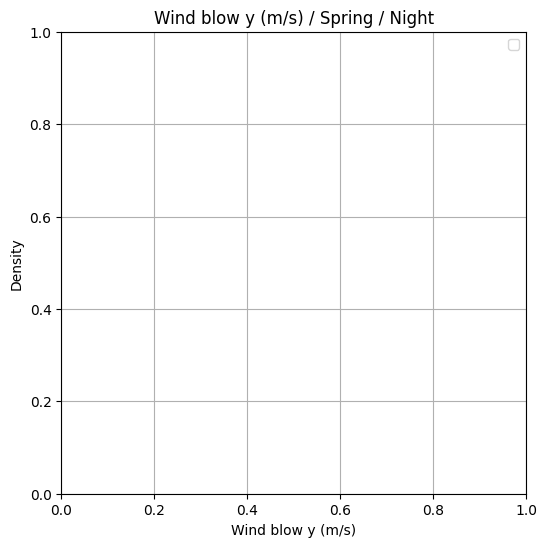

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

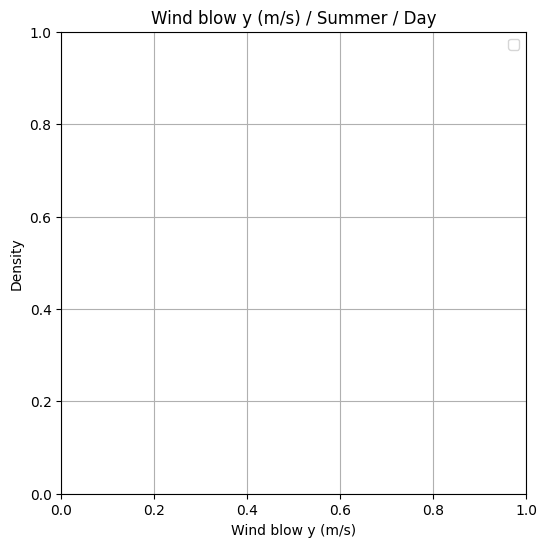

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

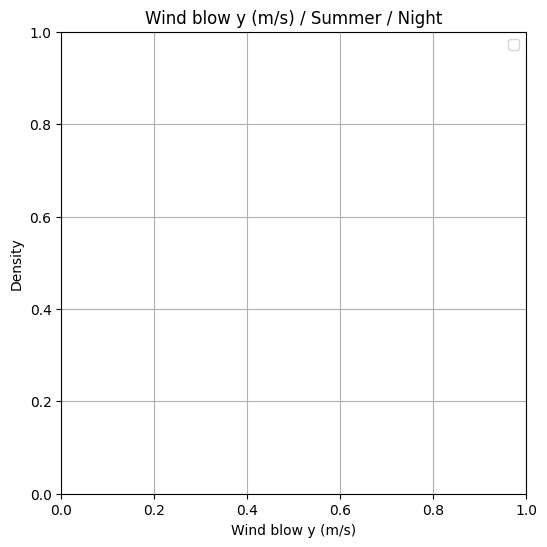

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

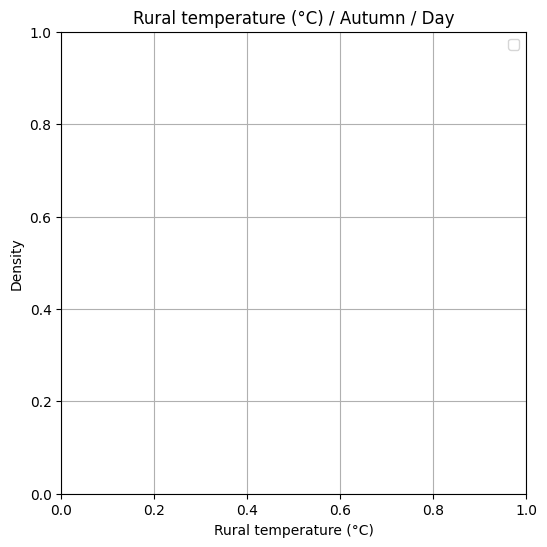

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

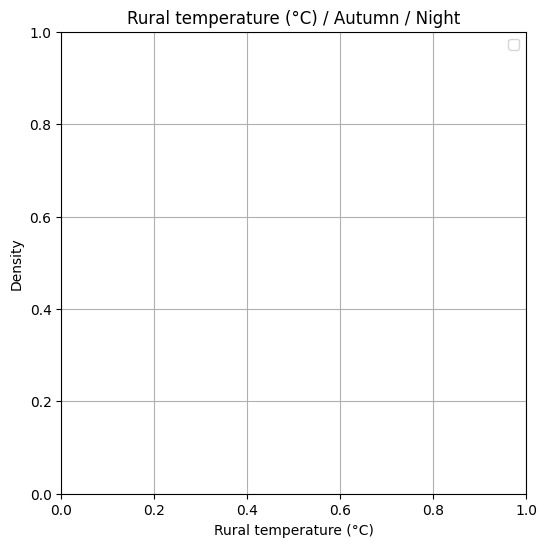

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

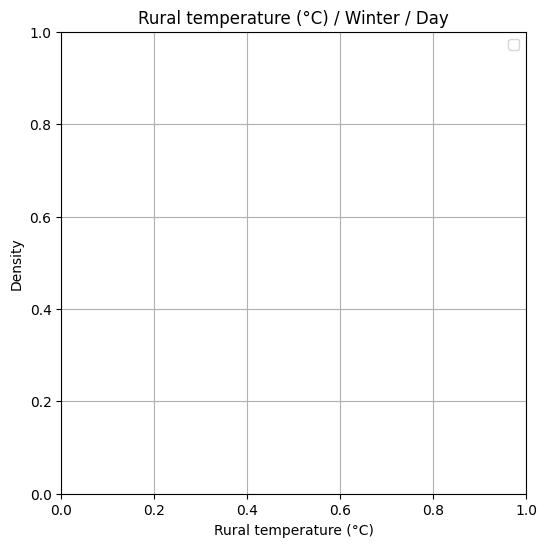

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

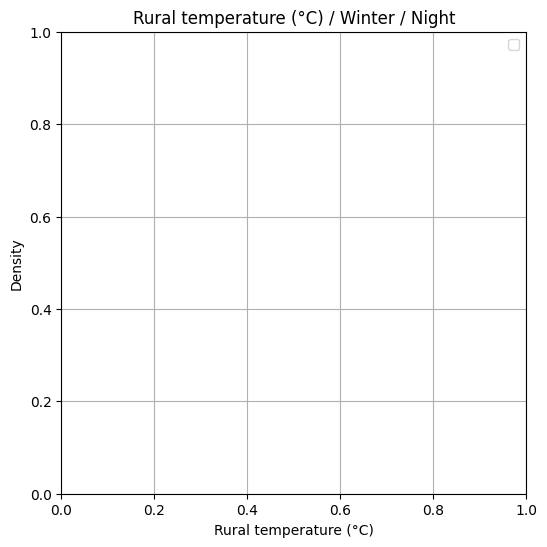

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

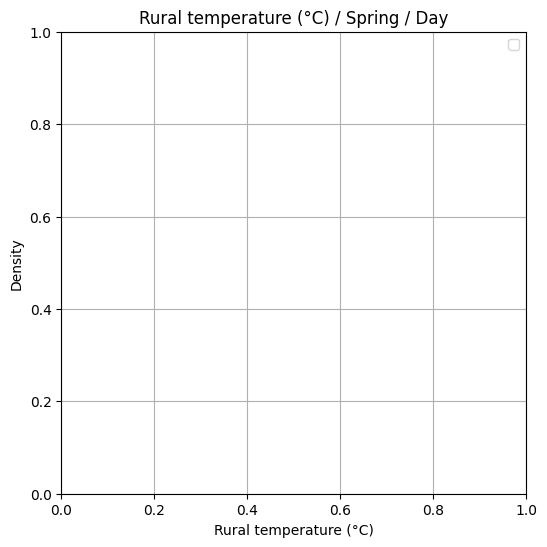

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

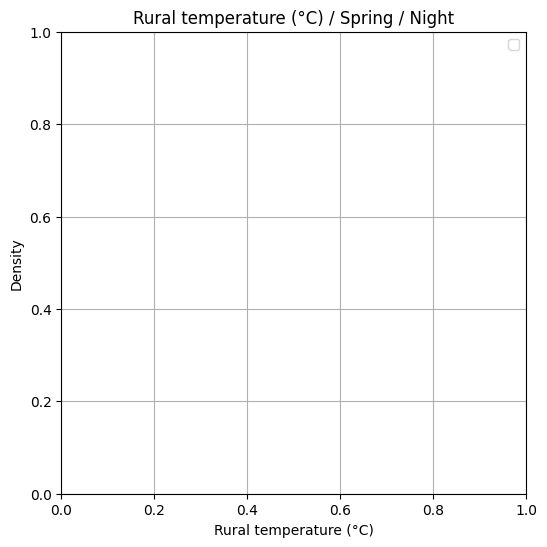

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

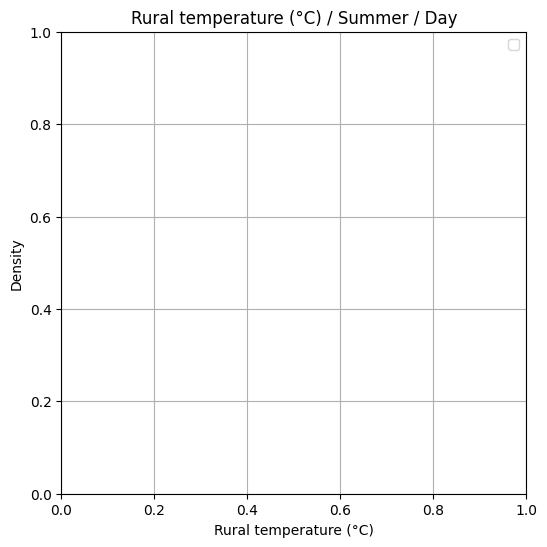

/tmp/ipykernel_5081/2386338723.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[(df['seasons'] == i) & (df['day_period'] == j) & (df['tercile'] == '1st tercile')][k], hist=False, label='1st tercile $\Delta_{T_{Urban} - T_{Rural}}$', color='mistyrose')
/tmp/ipykernel_5081/2386338723.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.githu

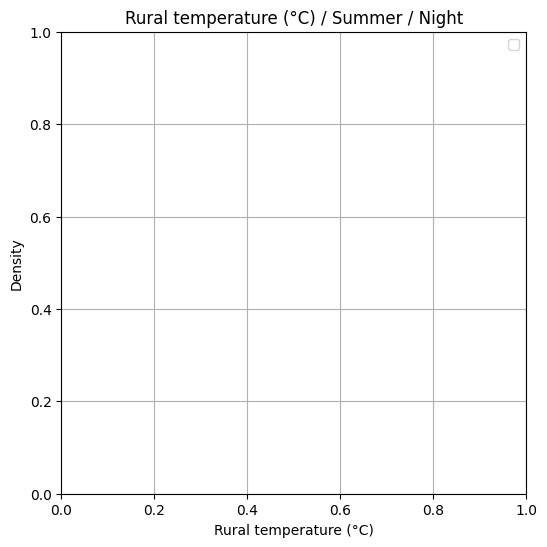

In [146]:
uhii_terciles_parameters(df=df_cluster_A_2)